

<!-- masukan dan pengembangan: andisetianto123@gmail.com -->

In [202]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [203]:
# pip install twint

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [204]:
pip install sastrawi

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [205]:
# !pip install --upgrade keras tensorflow
# from tensorflow.keras.preprocessing.sequence import pad_sequences


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [206]:
# !pip uninstall keras tensorflow
# !pip install keras tensorflow


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [207]:
# !pip install --upgrade tensorflow

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [208]:
# !pip install --upgrade keras


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [209]:


import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')
import twint
import nest_asyncio
nest_asyncio.apply()


import datetime as dt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud

from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Embedding, Dense, Dropout, LSTM
from keras.optimizers import Adam, RMSprop, SGD
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Collect Data tentang 'IKN'

In [210]:
    bearer_token = "ganti dengan token anda"
    consumer_key = "ganti dengan token anda"
    consumer_secret= "ganti dengan token anda"
    access_token ="ganti dengan token anda"
    access_token_secret = "ganti dengan token anda"


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [211]:
import tweepy
import pandas as pd
from datetime import datetime, timedelta


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)



def scraptweets(search_words, date_since, date_until):
    db_tweets = pd.DataFrame(columns=['id', 'username', 'created_at', 'tweet', 'retweets_count', 'likes_count'])

    tweets = tweepy.Cursor(
        api.search_tweets, q=search_words, lang="id",
        since=date_since, until=date_until, tweet_mode='extended').items(1000)

    for tweet in tweets:
        tweet_id = tweet.id
        username = tweet.user.screen_name
        created_at = tweet.created_at
        tweet_text = tweet.full_text
        retweets_count = tweet.retweet_count
        likes_count = tweet.favorite_count

        ith_tweet = [tweet_id, username, created_at, tweet_text, retweets_count, likes_count]
        db_tweets.loc[len(db_tweets)] = ith_tweet
    
    print('Total data awal:', len(db_tweets))
    filename = 'ikn_raw.csv'
    db_tweets.to_csv(filename, index=False)

today = datetime.today().strftime("%Y-%m-%d")
last_week = datetime.today() - timedelta(7)
last_week = last_week.strftime("%Y-%m-%d")

search_words = "IKN"
date_since = last_week
date_until = today

scraptweets(search_words, date_since, date_until)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/tweepy/auth.py:120: DeprecationWarning: OAuthHandler is deprecated; use OAuth1UserHandler instead.
  warnings.warn(


Total data awal: 1000


In [212]:
tweets_data = pd.read_csv('/content/ikn_raw.csv')
tweets = tweets_data[['id', 'username', 'created_at', 'tweet', 'retweets_count', 'likes_count']]
tweets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,username,created_at,tweet,retweets_count,likes_count
0,1664783901682966528,Klasterkarhutla,2023-06-02 23:59:47+00:00,@CNNIndonesia kalau cuma sedih orang utan jg sedang sedih hutannya digusur utk IKN,0,0
1,1664783849505816577,kompasiana,2023-06-02 23:59:34+00:00,Logo IKN: Sekilas Tentang Pohon Hayat dan Kisah Pemutaran Mandara Giri https://t.co/OdEF19C553,0,0
2,1664783581078757376,WangChuShe,2023-06-02 23:58:30+00:00,"RT @musniumar: Mengerikan sekali besarnya utang Indonesia yang tembus Rp20750 triliun. Kata Pak JK berutang itu mudah, yang susah membayarn…",271,0
3,1664783492612251655,MataunTuon,2023-06-02 23:58:09+00:00,"Kalau IKN memang serius..jngn terlalu lama urusan ngaduk aduk tanah. Percepat konstruksinya. Ini udah bulan Juni belum ada satu tiangpun terlihat untuk 4 kemenko, RS, fas ekonomi,Gedung Legislatif, tempat ibadah dll. @jokowi @KemenPU @ikn_id @tvOneNews @KompasTV @Metro_TV",0,0
4,1664782717542862848,sushiitr4shh,2023-06-02 23:55:04+00:00,IKN Nusantara akan menjadi kebanggaan semua masyarakat Indonesia dengan melihat kecanggihan pembangunan berkonsep smart city di IKN Nusantara #IKNPemerataanEkonomi #IKNSejahterakanIndonesia #IKN #IKNtingkatkanKesejahteraan #dukungproyekIKN #IKNNusantara https://t.co/nfwxtMyW6J,0,0
...,...,...,...,...,...,...
995,1664513987755778049,cukupsatukata_,2023-06-02 06:07:14+00:00,RT @RismayatiMaya: @projectm_org @geckoproj Kalau soal hutan sama hal nya dengan kalimantan hutannya di babat untuk sawit dan dibuat ibu ko…,1,0
996,1664513808885481474,AbudHendra,2023-06-02 06:06:31+00:00,@susipudjiastuti Yg di takutkan tuker tambah sama investasi di IKN... Sebagai bangsa yg berdaulat. Hendaknya membangun ibukota itu harus dgn kemandirian..,0,1
997,1664513801725833217,RRahmanjack,2023-06-02 06:06:30+00:00,RT @EdhunMr: Maka di tengah-tengah jalan negeri itu dan seberang-menyeberang sungai itu ada POHON HAYAT yang berbuah dua belas jenis; maka…,5,0
998,1664513484942643201,AgusOrbania1,2023-06-02 06:05:14+00:00,"RT @jokowi: Di dalamnya ada filosofi yang sejalan dengan semangat pembangunan IKN, menumbuhkan rasa bangga dengan jati diri bangsa Indonesi…",210,0


# Data Cleaning & Preprocessing

In [213]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) 
    text = re.sub(r'#[A-Za-z0-9]+', '', text) 
    text = re.sub(r'RT[\s]', '', text) 
    text = re.sub(r"http\S+", '', text)
    text = re.sub(r'[0-9]+', '', text) 

    text = text.replace('\n', ' ') 
    text = text.translate(str.maketrans('', '', string.punctuation)) 
    text = text.strip(' ') 
    return text

def casefoldingText(text): 
    text = text.lower() 
    return text

def tokenizingText(text): 
    text = word_tokenize(text) 
    return text

def filteringText(text): 
    listStopwords = set(stopwords.words('indonesian'))
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered 
    return text

def stemmingText(text): 
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = [stemmer.stem(word) for word in text]
    return text

def toSentence(list_words): 
    sentence = ' '.join(word for word in list_words)
    return sentence

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [214]:
def removeSlangWords(text):
    slang_words = {
        'gk': 'gak',
        'ga': 'gak',
        'nggak': 'gak',
        'krn': 'karena',
        'knp': 'kenapa',
        'ap': 'apa',
        'tp': 'tapi',
        'bgt': 'banget',
        'bgd': 'banget',
        'bnget': 'banget',
        'gt': 'gitu',
        'jg': 'juga',
        'jgn': 'jangan',
        'skg': 'sekarang',
        'tdk': 'tidak',
        'gw': 'saya',
        'gue': 'saya',
        'lu': 'kamu',
        'lo': 'kamu',
        'nih': 'ini',
        'aja': 'saja',
        'klo': 'kalau',
        'dr': 'dari',
        'sm': 'sama',
        'knpa': 'kenapa',
        'ngapain': 'kenapa',
        'btw': 'by the way',
        'om': 'saya',
        'tante': 'saya',
        'mas': 'saya',
        'mba': 'saya',
        'bro': 'saya',
        'sis': 'saya',
        'kak': 'saya',
        'cuma': 'hanya',
        'abis': 'habis',
        'deh': '',
        'nih': 'ini',
        'dah': 'sudah',
        'udh': 'udah',
        'bener': 'benar',
        'bgtu': 'begitu',
        'bgtuh': 'begitu',
        'emg': 'memang',
        'sih': '',
        'dong': '',
        'jln': 'jalan',
        'gmn': 'bagaimana',
        'pokoknya': '',
        'jd': 'jadi',
        'w': 'saya',
        'aku': 'saya',
        'kamu': 'kamu',
        'kita': 'kami',
        'kalian': 'mereka',
        'mereka': 'mereka',
        'aja': 'saja',
        'yg': 'yang',
        'sdh': 'sudah',
        'jd': 'jadi',
        'klo': 'kalau',
        'dgn': 'dengan',
        'lg': 'lagi',
        'tau': 'tahu',
        'smua': 'semua',
        'bngt': 'banget',
        'bngtz': 'banget',
        'msk': 'masuk',
        'ad': 'ada',
        'dpt': 'dapat',
        'tdk': 'tidak',
        'msh': 'masih',
        'aja': 'saja',
        'jm': 'jam',
        'dlm': 'dalam',
        'utk': 'untuk',
        'lbh': 'lebih',
        'krja': 'kerja',
        'kyk': 'kayak',
        'pn': 'pun',
        'ktnya': 'katanya',
        'slh': 'salah',
        'bkn': 'bukan',
        'sy': 'saya',
        'yg': 'yang',
        'sm': 'sama',
        'mlm': 'malam',
        'yg': 'yang',
        'tuh': 'itu',
        'lbih': 'lebih',
        'dkit': 'sedikit',
        'mslh': 'masalah',
        'org': 'orang',
        'skali': 'sekali',
        'mreka': 'mereka',
        'emang': 'memang',
        'wktu': 'waktu',
        'bnyk': 'banyak',
        'mlh': 'malah',
        'dri': 'dari',
        'bbrp': 'beberapa',
        'tpi': 'tapi',
        'nnti': 'nanti',
        'si': '',
        'hehe': '',
        'hihi': '',
        'haha': '',
        'hooh': '',
        'hu': '',
        'wk': '',
        'wkwk': '',
        'hore': '',
        'yuhuu': '',
    }

    words = text.split()
    words = [slang_words[word] if word in slang_words else word for word in words]
    text = ' '.join(words)
    return text


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [215]:
import nltk

nltk.download('punkt')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [216]:
tweets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,username,created_at,tweet,retweets_count,likes_count
0,1664783901682966528,Klasterkarhutla,2023-06-02 23:59:47+00:00,@CNNIndonesia kalau cuma sedih orang utan jg sedang sedih hutannya digusur utk IKN,0,0
1,1664783849505816577,kompasiana,2023-06-02 23:59:34+00:00,Logo IKN: Sekilas Tentang Pohon Hayat dan Kisah Pemutaran Mandara Giri https://t.co/OdEF19C553,0,0
2,1664783581078757376,WangChuShe,2023-06-02 23:58:30+00:00,"RT @musniumar: Mengerikan sekali besarnya utang Indonesia yang tembus Rp20750 triliun. Kata Pak JK berutang itu mudah, yang susah membayarn…",271,0
3,1664783492612251655,MataunTuon,2023-06-02 23:58:09+00:00,"Kalau IKN memang serius..jngn terlalu lama urusan ngaduk aduk tanah. Percepat konstruksinya. Ini udah bulan Juni belum ada satu tiangpun terlihat untuk 4 kemenko, RS, fas ekonomi,Gedung Legislatif, tempat ibadah dll. @jokowi @KemenPU @ikn_id @tvOneNews @KompasTV @Metro_TV",0,0
4,1664782717542862848,sushiitr4shh,2023-06-02 23:55:04+00:00,IKN Nusantara akan menjadi kebanggaan semua masyarakat Indonesia dengan melihat kecanggihan pembangunan berkonsep smart city di IKN Nusantara #IKNPemerataanEkonomi #IKNSejahterakanIndonesia #IKN #IKNtingkatkanKesejahteraan #dukungproyekIKN #IKNNusantara https://t.co/nfwxtMyW6J,0,0
...,...,...,...,...,...,...
995,1664513987755778049,cukupsatukata_,2023-06-02 06:07:14+00:00,RT @RismayatiMaya: @projectm_org @geckoproj Kalau soal hutan sama hal nya dengan kalimantan hutannya di babat untuk sawit dan dibuat ibu ko…,1,0
996,1664513808885481474,AbudHendra,2023-06-02 06:06:31+00:00,@susipudjiastuti Yg di takutkan tuker tambah sama investasi di IKN... Sebagai bangsa yg berdaulat. Hendaknya membangun ibukota itu harus dgn kemandirian..,0,1
997,1664513801725833217,RRahmanjack,2023-06-02 06:06:30+00:00,RT @EdhunMr: Maka di tengah-tengah jalan negeri itu dan seberang-menyeberang sungai itu ada POHON HAYAT yang berbuah dua belas jenis; maka…,5,0
998,1664513484942643201,AgusOrbania1,2023-06-02 06:05:14+00:00,"RT @jokowi: Di dalamnya ada filosofi yang sejalan dengan semangat pembangunan IKN, menumbuhkan rasa bangga dengan jati diri bangsa Indonesi…",210,0


In [217]:
# Preprocessing tweets data

tweets['text_clean'] = tweets['tweet'].apply(cleaningText)
tweets['text_clean'] = tweets['text_clean'].apply(casefoldingText)
tweets.drop(['tweet'], axis = 1, inplace = True)





/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [218]:
import nltk
import os


nltk.data.path.append("/path/to/nltk_data")


nltk.download('stopwords', download_dir="/path/to/nltk_data")


print(nltk.data.find('corpora/stopwords'))


tweets['text_preprocessed'] = tweets['text_clean'].apply(tokenizingText)
tweets['text_preprocessed'] = tweets['text_preprocessed'].apply(filteringText)
tweets['text_preprocessed'] = tweets['text_preprocessed'].apply(stemmingText)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /path/to/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/path/to/nltk_data/corpora/stopwords


In [219]:
# drop duplicates/spams tweets
tweets.drop_duplicates(subset = 'text_clean', inplace = True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [220]:
# Export to csv file
tweets.to_csv(r'ikn_clean.csv', index = False, header = True,index_label=None)

tweets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,username,created_at,retweets_count,likes_count,text_clean,text_preprocessed
0,1664783901682966528,Klasterkarhutla,2023-06-02 23:59:47+00:00,0,0,kalau cuma sedih orang utan jg sedang sedih hutannya digusur utk ikn,"[sedih, orang, utan, jg, sedih, hutan, gusur, utk, ikn]"
1,1664783849505816577,kompasiana,2023-06-02 23:59:34+00:00,0,0,logo ikn sekilas tentang pohon hayat dan kisah pemutaran mandara giri,"[logo, ikn, kilas, pohon, hayat, kisah, putar, mandara, giri]"
2,1664783581078757376,WangChuShe,2023-06-02 23:58:30+00:00,271,0,mengerikan sekali besarnya utang indonesia yang tembus rp triliun kata pak jk berutang itu mudah yang susah membayarn…,"[keri, besar, utang, indonesia, tembus, rp, triliun, jk, utang, mudah, susah, membayarn]"
3,1664783492612251655,MataunTuon,2023-06-02 23:58:09+00:00,0,0,kalau ikn memang seriusjngn terlalu lama urusan ngaduk aduk tanah percepat konstruksinya ini udah bulan juni belum ada satu tiangpun terlihat untuk kemenko rs fas ekonomigedung legislatif tempat ibadah dll id tv,"[ikn, seriusjngn, urus, ngaduk, aduk, tanah, cepat, konstruksi, udah, juni, tiang, kemenko, rs, fas, ekonomigedung, legislatif, ibadah, dll, id, tv]"
4,1664782717542862848,sushiitr4shh,2023-06-02 23:55:04+00:00,0,0,ikn nusantara akan menjadi kebanggaan semua masyarakat indonesia dengan melihat kecanggihan pembangunan berkonsep smart city di ikn nusantara,"[ikn, nusantara, bangga, masyarakat, indonesia, canggih, bangun, konsep, smart, city, ikn, nusantara]"
...,...,...,...,...,...,...,...
989,1664514566657839105,Anaksemut4,2023-06-02 06:09:32+00:00,0,1,harusnya legacy seperti ikn dan kcic yg tidak pakai apbn ya,"[legacy, ikn, kcic, yg, pakai, apbn, ya]"
991,1664514498299035648,republik_in,2023-06-02 06:09:16+00:00,0,1,ikn bakalan jadi akan mangkrak,"[ikn, mangkrak]"
993,1664514399275720706,SGumilang83509,2023-06-02 06:08:52+00:00,1,9,berarti kerja heru ga bener nih masa ga bisa memaksimalkan program pemprov jangan sampai ikn juga nasibnya sama klo presidennya modelan heru begini,"[kerja, heru, ga, bener, nih, ga, maksimal, program, pemprov, ikn, nasib, klo, presiden, model, heru]"
995,1664513987755778049,cukupsatukata_,2023-06-02 06:07:14+00:00,1,0,org kalau soal hutan sama hal nya dengan kalimantan hutannya di babat untuk sawit dan dibuat ibu ko…,"[org, hutan, nya, kalimantan, hutan, babat, sawit, ko]"


#Topic Analysis & Extraction

In [221]:
# pip install pyLDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [222]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from gensim import corpora
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

dictionary = corpora.Dictionary(tweets['text_preprocessed'])
corpus = [dictionary.doc2bow(text) for text in tweets['text_preprocessed']]
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, random_state=42, passes=10)
coherence_model = CoherenceModel(model=lda_model, texts=tweets['text_preprocessed'], dictionary=dictionary, coherence='c_v')
coherence = coherence_model.get_coherence()
topics_df = pd.DataFrame(columns=['Validation_Set', 'Topics', 'Alpha', 'Beta', 'Coherence'])
topics_df.loc[0] = ['ikn_clean.csv', 5, 'auto', 'auto', coherence]
lda_display = gensimvis.prepare(lda_model, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Polaritas Sentimen  menggunakan Indonesian Sentiment Lexicon

In [223]:
# MENGGUNAKAN indonesia sentiment lexicon (source : https://github.com/fajri91/InSet)

lexicon_positive = dict()
import csv
with open('/content/drive/MyDrive/Tugas Sanbercode Sentiment Analysis/lexicon_negative.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
import csv
with open('/content/drive/MyDrive/Tugas Sanbercode Sentiment Analysis/lexicon_positive.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
        
       
def sentiment_analysis_lexicon_indonesia(text):
    score = 0
    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
    polarity=''
    if (score > 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'
    else:
        polarity = 'neutral'
    return score, polarity

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [224]:

results = tweets['text_preprocessed'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
tweets['polarity_score'] = results[0]
tweets['polarity'] = results[1]
print(tweets['polarity'].value_counts())

tweets.to_csv(r'ikn_clean_polarity.csv', index = False, header = True,index_label=None)

tweets

polarity
negative    222
positive    165
neutral      94
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,username,created_at,retweets_count,likes_count,text_clean,text_preprocessed,polarity_score,polarity
0,1664783901682966528,Klasterkarhutla,2023-06-02 23:59:47+00:00,0,0,kalau cuma sedih orang utan jg sedang sedih hutannya digusur utk ikn,"[sedih, orang, utan, jg, sedih, hutan, gusur, utk, ikn]",-12,negative
1,1664783849505816577,kompasiana,2023-06-02 23:59:34+00:00,0,0,logo ikn sekilas tentang pohon hayat dan kisah pemutaran mandara giri,"[logo, ikn, kilas, pohon, hayat, kisah, putar, mandara, giri]",-3,negative
2,1664783581078757376,WangChuShe,2023-06-02 23:58:30+00:00,271,0,mengerikan sekali besarnya utang indonesia yang tembus rp triliun kata pak jk berutang itu mudah yang susah membayarn…,"[keri, besar, utang, indonesia, tembus, rp, triliun, jk, utang, mudah, susah, membayarn]",-7,negative
3,1664783492612251655,MataunTuon,2023-06-02 23:58:09+00:00,0,0,kalau ikn memang seriusjngn terlalu lama urusan ngaduk aduk tanah percepat konstruksinya ini udah bulan juni belum ada satu tiangpun terlihat untuk kemenko rs fas ekonomigedung legislatif tempat ibadah dll id tv,"[ikn, seriusjngn, urus, ngaduk, aduk, tanah, cepat, konstruksi, udah, juni, tiang, kemenko, rs, fas, ekonomigedung, legislatif, ibadah, dll, id, tv]",1,positive
4,1664782717542862848,sushiitr4shh,2023-06-02 23:55:04+00:00,0,0,ikn nusantara akan menjadi kebanggaan semua masyarakat indonesia dengan melihat kecanggihan pembangunan berkonsep smart city di ikn nusantara,"[ikn, nusantara, bangga, masyarakat, indonesia, canggih, bangun, konsep, smart, city, ikn, nusantara]",3,positive
...,...,...,...,...,...,...,...,...,...
989,1664514566657839105,Anaksemut4,2023-06-02 06:09:32+00:00,0,1,harusnya legacy seperti ikn dan kcic yg tidak pakai apbn ya,"[legacy, ikn, kcic, yg, pakai, apbn, ya]",0,neutral
991,1664514498299035648,republik_in,2023-06-02 06:09:16+00:00,0,1,ikn bakalan jadi akan mangkrak,"[ikn, mangkrak]",0,neutral
993,1664514399275720706,SGumilang83509,2023-06-02 06:08:52+00:00,1,9,berarti kerja heru ga bener nih masa ga bisa memaksimalkan program pemprov jangan sampai ikn juga nasibnya sama klo presidennya modelan heru begini,"[kerja, heru, ga, bener, nih, ga, maksimal, program, pemprov, ikn, nasib, klo, presiden, model, heru]",11,positive
995,1664513987755778049,cukupsatukata_,2023-06-02 06:07:14+00:00,1,0,org kalau soal hutan sama hal nya dengan kalimantan hutannya di babat untuk sawit dan dibuat ibu ko…,"[org, hutan, nya, kalimantan, hutan, babat, sawit, ko]",6,positive


#Analysis and Visualization

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


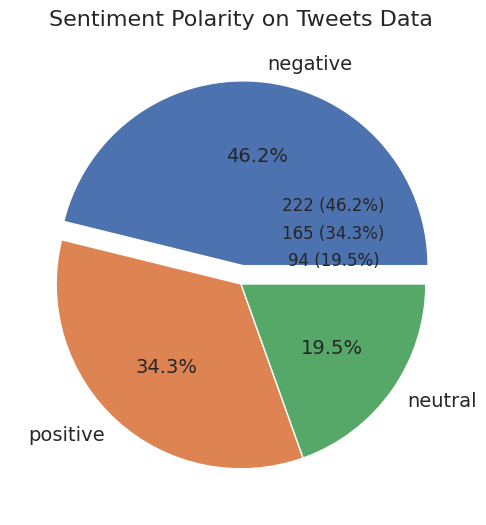

In [226]:
fig, ax = plt.subplots(figsize=(6, 6))
counts = tweets['polarity'].value_counts()
labels = list(counts.index)
sizes = list(counts.values)
explode = (0.1, 0, 0)
ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14})
ax.set_title('Sentiment Polarity on Tweets Data', fontsize=16, pad=20)

total = sum(sizes)
for i, size in enumerate(sizes):
    percentage = size / total * 100
    ax.text(x=0.5, y=0.4-i*0.15, s=f'{size} ({percentage:.1f}%)', fontsize=12, ha='center')

plt.show()


In [227]:
pd.set_option('display.max_colwidth', 3000)
positive_tweets = tweets[tweets['polarity'] == 'positive']
positive_tweets = positive_tweets[['text_clean', 'polarity_score', 'polarity']].sort_values(by = 'polarity_score', ascending=False).reset_index(drop = True)
positive_tweets.index += 1
positive_tweets[0:30]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,text_clean,polarity_score,polarity
1,vivo iqoo zx harga spesial bos event shopee ramrom 🛒 andara ini beneran cipung raffi one ok rock cbx salim bulan juni always with exo logo ikn indomie hello baby boba hotel gen garut buya yahya tangled logo ikn indomie,26,positive
2,goceng ajaa bang gocenggg🤣🤣 tag andara ini beneran semangat adel cipung raffi one ok rock cbx salim bulan juni always with exo logo ikn indomie hello baby boba hotel gen garut buya yahya tangled logo ikn indomie hello baby boba hotel gen garut buya yahya tangled…,24,positive
3,kenapa lagi nih rendy 🥴🥴 tag andara ini beneran semangat adel cipung raffi one ok rock cbx salim bulan juni always with exo logo ikn indomie hello baby boba hotel gen garut buya yahya tangled …,19,positive
4,goceng ajaa bang gocenggg🤣🤣 tag andara ini beneran semangat adel cipung raffi one ok rock cbx salim bulan juni always with exo logo ikn indomie hello baby boba hotel gen garut buya yahya tangled …,19,positive
5,si abang ngantuk berattt ya🙃🙃 tag andara ini beneran semangat adel cipung raffi one ok rock cbx salim bulan juni always with exo logo ikn indomie hello baby boba hotel gen garut buya yahya tangled …,17,positive
6,ngantuk kali ya mpusss😩😩 tag andara ini beneran semangat adel cipung raffi one ok rock cbx salim bulan juni always with exo logo ikn indomie hello baby boba hotel gen garut buya yahya tangled …,17,positive
7,ett dah cingg tag andara ini beneran semangat adel cipung raffi one ok rock cbx salim bulan juni always with exo logo ikn indomie hello baby boba hotel gen garut buya yahya tangled …,16,positive
8,selamat pagi indonesia semangat pagi untuk semangat indonesia baru selamat datang logo ikn 🇮🇩,16,positive
9,presiden joko widodo secara resmi meluncurkan logo ibu kota nusantara ikn di istana negara jakarta pada selasa logo yang nantinya akan menjadi identitas visual bagi ikn tersebut memiliki tema pohon hayat dengan sejumlah makna di dalamnya namun di media sosial…,14,positive
10,ikn adalah jalan menuju peradaban dunia yang maju dan ramah lingkungan kojta masa depan tapi bicara peradaban itu sulit diterima oleh k drone karena memang tidak punya adab maunya ke jaman batu bisa pilih siapapun perempuan semaunya,12,positive


In [228]:
pd.set_option('display.max_colwidth', 3000)
negative_tweets = tweets[tweets['polarity'] == 'negative']
negative_tweets = negative_tweets[['text_clean', 'polarity_score', 'polarity']].sort_values(by = 'polarity_score', ascending=True)[0:10].reset_index(drop = True)
negative_tweets.index += 1
negative_tweets[0:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,text_clean,polarity_score,polarity
1,bahrawi itulah sebabnya ikn ngotot di wujudkan ujung ujungnya para siluman siluman baru beli tanah di seluruh kalimantan siluman baru dari sungai sungai kuning,-28,negative
2,gimana kalo dibalik begini baru tau kalo april nanti harus pindah ke ikn kasian asn yang terpaksa ninggalin jakarta krn keputusan peninggalan jokowi karena sudah kontrak terpaksa harus pindah dgn setengah hati,-26,negative
3,memang apa berguna itu ikn yg baru sudah kesenjangan kaya miskin makin lebar gizi buruk pada anak selalu meningkat ekonomi di rezim petruk gak pernah bagus penegak hukum macam sampah korupsi dimanamana utang makin gak ngotak malah bikin masalah terus blok,-25,negative
4,negara isinya makelar nggak makelar motor listrik mobil listrik tanah kereta cepat investasi ikn apalagi dah tu sampe pasir ikutan di makelarin,-20,negative
5,putri k wardani menghadiri peluncuran logo ikn di istana negara logo tersebut memiliki tema “pohon hayat” pohon hayat adalah pohon kehidupan yg diharapkan akan menginspirasi ikn untuk menjadi tempat kehidupan baru dan sumber kehidupan bagi seluruh masyarakat indonesia,-19,negative
6,lung pohon hayat adalah pohon kehidupan dan kita berharap logo pohon hayat ini akan menginspirasi ikn untuk menciptakan tempat…,-18,negative
7,wakakak ngacoo mana ada power oposisi di parlemen bisa apa dari segi jumlah aja sudah kalah sebagai contoh uu kpk dan uu ikn yang pembahasannya kilat apa jadinya eksekutif pemerintah parlemen legislatif yudikatif mahkamah dikuasai absolutrakyat yg manggut aj,-17,negative
8,pelototi terus jkw rezim tolak periode penundaan pemilu tolak ikn batalkan kenaikan ppn pecat luh…,-17,negative
9,masalah penjara penuh itu udah ada sejak bapak jadi menteri kenapa dari dulu gak bangun penjara baru biaya bikin ikn bisa tuh jadi penjara baru buat beli lahan pembangunan sampai peralatannya malah bisa jadi lebih dari penjara,-17,negative
10,pohon hayat ini adalah pohon kehidupan dan kita semuanya berharap logo pohon hayat ini akan menginspirasi ikn untuk menciptakan tempat kehidupan baru bagi kita semuanya yang menjadi sumber kehidupan bagi seluruh masyarakat indonesia nantinya ujar presiden,-16,negative


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


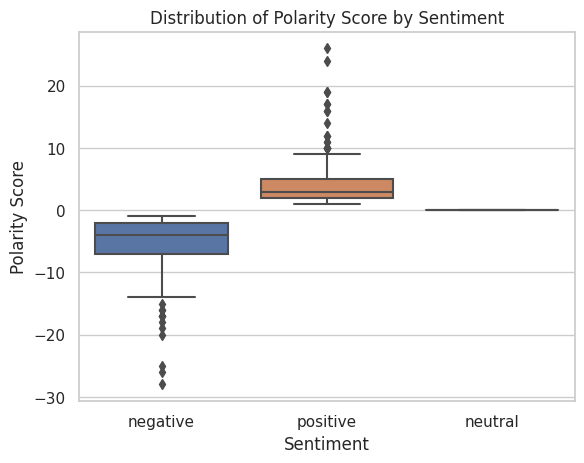

In [229]:
import seaborn as sns

sns.boxplot(x='polarity', y='polarity_score', data=tweets)
plt.xlabel('Sentiment')
plt.ylabel('Polarity Score')
plt.title('Distribution of Polarity Score by Sentiment')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


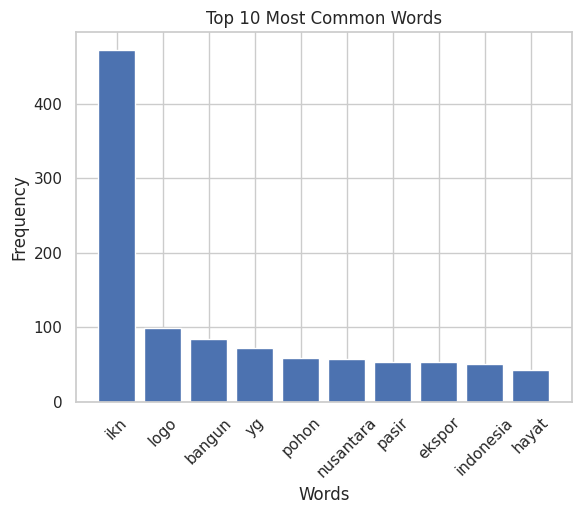

In [230]:
from collections import Counter
import matplotlib.pyplot as plt

all_words = ' '.join(' '.join(words) for words in tweets['text_preprocessed'])
word_counts = Counter(all_words.split())

top_words = word_counts.most_common(10)
labels, values = zip(*top_words)

plt.bar(labels, values)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words')
plt.xticks(rotation=45)
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


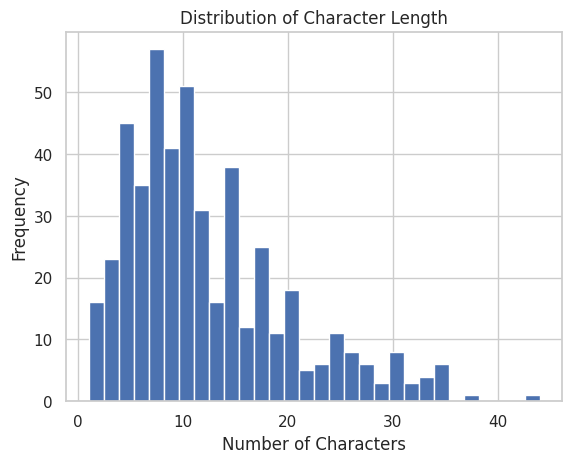

In [231]:
import matplotlib.pyplot as plt

tweet_lengths = tweets['text_preprocessed'].apply(len)

plt.hist(tweet_lengths, bins=30)
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.title('Distribution of Character Length')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


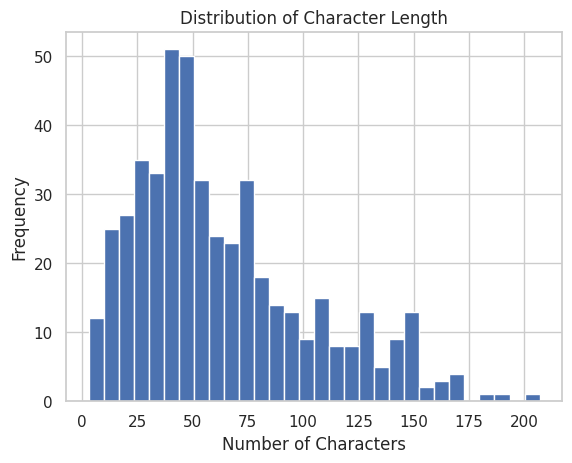

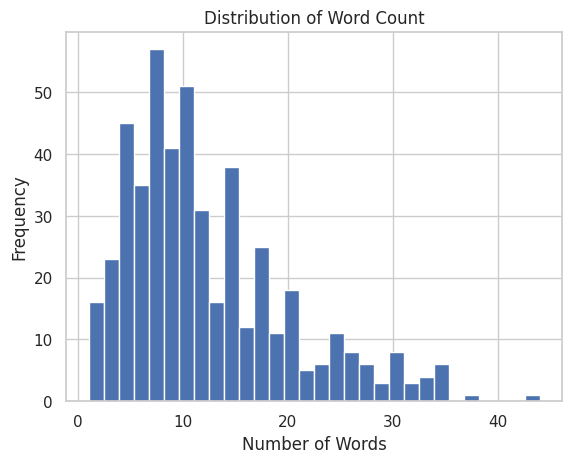

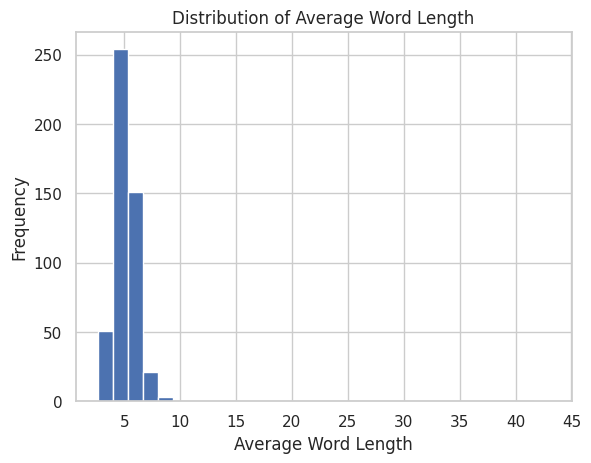

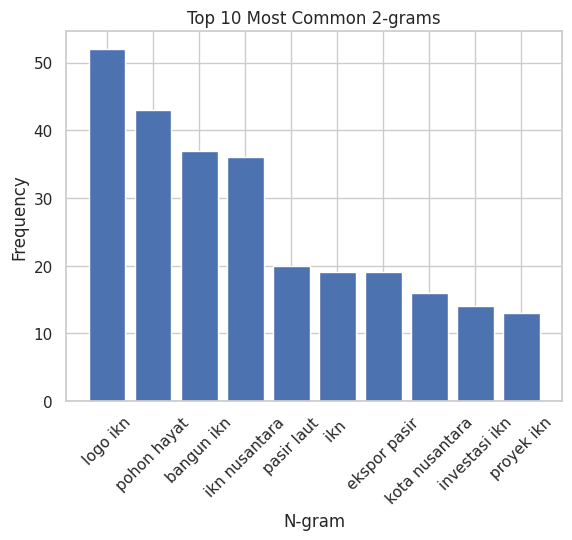

In [232]:
import matplotlib.pyplot as plt
from nltk import ngrams

# Distribusi Frekuensi Jumlah Huruf
tweet_lengths = tweets['text_preprocessed'].apply(lambda x: len(''.join(x)))

plt.hist(tweet_lengths, bins=30)
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.title('Distribution of Character Length')
plt.show()

# Distribusi Frekuensi Jumlah Kata
word_counts = tweets['text_preprocessed'].apply(len)

plt.hist(word_counts, bins=30)
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Word Count')
plt.show()

# Distribusi Frekuensi Panjang Kata Rata-rata
average_word_lengths = tweets['text_preprocessed'].apply(lambda x: sum(len(word) for word in x) / len(x))

plt.hist(average_word_lengths, bins=30)
plt.xlabel('Average Word Length')
plt.ylabel('Frequency')
plt.title('Distribution of Average Word Length')
plt.show()

# Distribusi Frekuensi N-gram
n = 2  

ngram_counts = tweets['text_preprocessed'].apply(lambda x: list(ngrams(x, n)))
ngram_counts = [ngram for ngrams_list in ngram_counts for ngram in ngrams_list]

ngram_freq = Counter(ngram_counts)

labels, values = zip(*ngram_freq.most_common(10))
labels = [' '.join(label) for label in labels] 

plt.bar(labels, values)
plt.xlabel('N-gram')
plt.ylabel('Frequency')
plt.title(f'Top 10 Most Common {n}-grams')
plt.xticks(rotation=45)
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


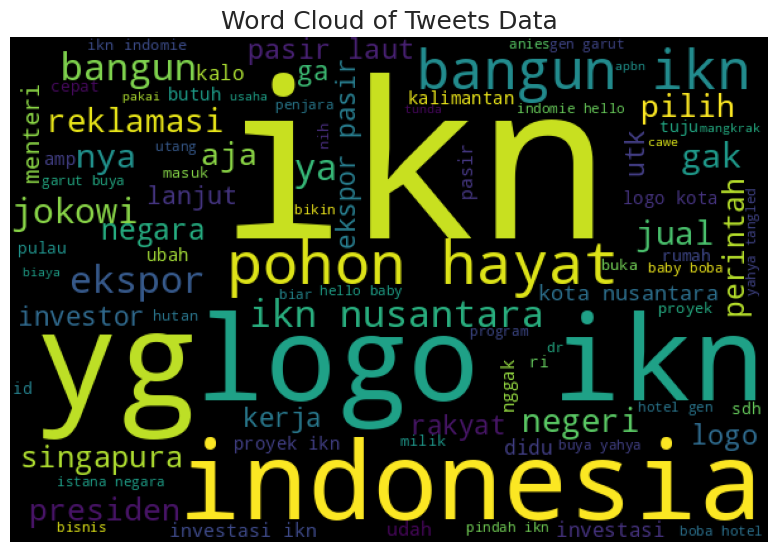

In [233]:


list_words=''
for tweet in tweets['text_preprocessed']:
    for word in tweet:
        list_words += ' '+(word)
        
wordcloud = WordCloud(width = 600, height = 400, background_color = 'black', min_font_size = 10).generate(list_words)
fig, ax = plt.subplots(figsize = (8, 6))
ax.set_title('Word Cloud of Tweets Data', fontsize = 18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

In [234]:
# Function to group all positive/negative words
def words_with_sentiment(text):
    positive_words=[]
    negative_words=[]
    for word in text:
        score_pos = 0
        score_neg = 0
        if (word in lexicon_positive):
            score_pos = lexicon_positive[word]
        if (word in lexicon_negative):
            score_neg = lexicon_negative[word]
        
        if (score_pos + score_neg > 0):
            positive_words.append(word)
        elif (score_pos + score_neg < 0):
            negative_words.append(word)
            
    return positive_words, negative_words

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cm

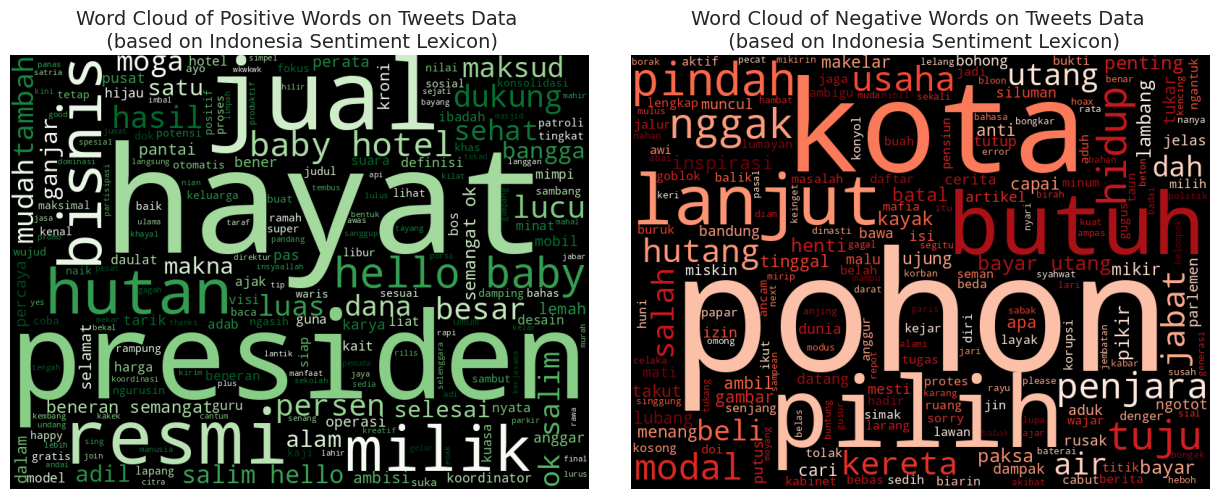

In [235]:
# Visualize positive and negative word cloud

sentiment_words = tweets['text_preprocessed'].apply(words_with_sentiment)
sentiment_words = list(zip(*sentiment_words))
positive_words = sentiment_words[0]
negative_words = sentiment_words[1]

fig, ax = plt.subplots(1, 2,figsize = (12, 10))
list_words_postive=''
for row_word in positive_words:
    for word in row_word:
        list_words_postive += ' '+(word)
wordcloud_positive = WordCloud(width = 800, height = 600, background_color = 'black', colormap = 'Greens'
                               , min_font_size = 10).generate(list_words_postive)
ax[0].set_title('Word Cloud of Positive Words on Tweets Data \n (based on Indonesia Sentiment Lexicon)', fontsize = 14)
ax[0].grid(False)
ax[0].imshow((wordcloud_positive))
fig.tight_layout(pad=0)
ax[0].axis('off')

list_words_negative=''
for row_word in negative_words:
    for word in row_word:
        list_words_negative += ' '+(word)
wordcloud_negative = WordCloud(width = 800, height = 600, background_color = 'black', colormap = 'Reds'
                               , min_font_size = 10).generate(list_words_negative)
ax[1].set_title('Word Cloud of Negative Words on Tweets Data \n (based on Indonesia Sentiment Lexicon)', fontsize = 14)
ax[1].grid(False)
ax[1].imshow((wordcloud_negative))
fig.tight_layout(pad=0)
ax[1].axis('off')

plt.show()

# Sentiment Analysis Using CNN

In [236]:
X = tweets['text_preprocessed'].apply(toSentence) 
max_features = 5000

tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(X.values)
X = tokenizer.texts_to_sequences(X.values)
X = pad_sequences(X)
X.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(481, 44)

In [237]:
polarity_encode = {'negative' : 0, 'neutral' : 1, 'positive' : 2}
y = tweets['polarity'].map(polarity_encode).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(384, 44) (384,)
(97, 44) (97,)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CNN

In [238]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dropout, Dense
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
import random

def create_model(embed_dim=16, filters=32, kernel_size=3, hidden_unit=16, dropout_rate=0.2, optimizer=Adam, learning_rate=0.001):
    model = Sequential()
    model.add(Embedding(input_dim=max_features, output_dim=embed_dim, input_length=X_train.shape[1]))
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(units=hidden_unit, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=3, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer(learning_rate=learning_rate), metrics=['accuracy'])
    print(model.summary())
    return model

model = KerasClassifier(build_fn=create_model, epochs=25, batch_size=128)

# Hyperparameters
embed_dim = [32, 64, 128]  
filters = [32, 64, 128]  
kernel_size = [3, 5, 7] 
hidden_unit = [16, 32, 64]
dropout_rate = [0.2, 0.3]  
optimizer = [Adam, RMSprop]
learning_rate = [0.01, 0.001, 0.0001]
epochs = [25, 50, 100]  
batch_size = [128, 256, 512]  
param_dist = dict(
    embed_dim=embed_dim,
    filters=filters,
    kernel_size=kernel_size,
    hidden_unit=hidden_unit,
    dropout_rate=dropout_rate,
    optimizer=optimizer,
    learning_rate=learning_rate,
    epochs=epochs,
    batch_size=batch_size
)

# Evaluation model with RandomizedSearchCV to determine the best hyperparameters
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=30, cv=3, random_state=random.seed())
random_search_result = random_search.fit(X_train, y_train)

results = pd.DataFrame()
results['means'] = random_search_result.cv_results_['mean_test_score']
results['stds'] = random_search_result.cv_results_['std_test_score']
results['params'] = random_search_result.cv_results_['params']
print("Best: %f using %s" % (random_search_result.best_score_, random_search_result.best_params_))
results.to_csv(r'randomizedsearchcv_results.csv', index=False, header=True)
results.sort_values(by='means', ascending=False).reset_index(drop=True)

# Create the model with the best hyperparameters
best_params = random_search_result.best_params_
model = KerasClassifier(build_fn=create_model, **best_params, validation_split=0.1)

model_prediction = model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-238-cba258222bd6>:22: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=25, batch_size=128)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)
/usr/local/lib/python3.10/dist-packages/skle

Model: "sequential_404"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_404 (Embedding)   (None, 44, 128)           640000    
                                                                 
 conv1d_404 (Conv1D)         (None, 38, 128)           114816    
                                                                 
 global_max_pooling1d_404 (G  (None, 128)              0         
 lobalMaxPooling1D)                                              
                                                                 
 dense_776 (Dense)           (None, 32)                4128      
                                                                 
 dropout_404 (Dropout)       (None, 32)                0         
                                                                 
 dense_777 (Dense)           (None, 3)                 99        
                                                    

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/50
2/2 [==============================] - 1s 126ms/step - loss: 1.0976 - accuracy: 0.3164
Epoch 2/50
2/2 [==============================] - 0s 149ms/step - loss: 1.0535 - accuracy: 0.5625
Epoch 3/50
2/2 [==============================] - 0s 130ms/step - loss: 1.0141 - accuracy: 0.5938
Epoch 4/50
2/2 [==============================] - 0s 130ms/step - loss: 0.9897 - accuracy: 0.5547
Epoch 5/50
2/2 [==============================] - 0s 128ms/step - loss: 0.9604 - accuracy: 0.5898
Epoch 6/50
2/2 [==============================] - 0s 141ms/step - loss: 0.9269 - accuracy: 0.5938
Epoch 7/50
2/2 [==============================] - 0s 131ms/step - loss: 0.9029 - accuracy: 0.6250
Epoch 8/50
2/2 [==============================] - 0s 135ms/step - loss: 0.8728 - accuracy: 0.6484
Epoch 9/50
2/2 [==============================] - 0s 130ms/step - loss: 0.8453 - accuracy: 0.6680
Epoch 10/50
2/2 [==============================] - 0s 138ms/step - loss: 0.8117 - accuracy: 0.7148
Epoch 11/50
2/2 [==

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/50
2/2 [==============================] - 1s 142ms/step - loss: 1.1041 - accuracy: 0.2695
Epoch 2/50
2/2 [==============================] - 0s 129ms/step - loss: 1.0746 - accuracy: 0.5078
Epoch 3/50
2/2 [==============================] - 0s 141ms/step - loss: 1.0470 - accuracy: 0.5508
Epoch 4/50
2/2 [==============================] - 0s 128ms/step - loss: 1.0173 - accuracy: 0.5273
Epoch 5/50
2/2 [==============================] - 0s 148ms/step - loss: 0.9898 - accuracy: 0.5039
Epoch 6/50
2/2 [==============================] - 0s 140ms/step - loss: 0.9567 - accuracy: 0.5156
Epoch 7/50
2/2 [==============================] - 0s 128ms/step - loss: 0.9290 - accuracy: 0.5703
Epoch 8/50
2/2 [==============================] - 0s 133ms/step - loss: 0.8988 - accuracy: 0.6211
Epoch 9/50
2/2 [==============================] - 0s 138ms/step - loss: 0.8672 - accuracy: 0.6445
Epoch 10/50
2/2 [==============================] - 0s 131ms/step - loss: 0.8208 - accuracy: 0.6836
Epoch 11/50
2/2 [==

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 1.1114 - accuracy: 0.2070
Epoch 2/100
1/1 [==============================] - 0s 35ms/step - loss: 1.0476 - accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 42ms/step - loss: 0.9983 - accuracy: 0.5312
Epoch 4/100
1/1 [==============================] - 0s 32ms/step - loss: 0.9319 - accuracy: 0.5625
Epoch 5/100
1/1 [==============================] - 0s 35ms/step - loss: 0.8550 - accuracy: 0.6406
Epoch 6/100
1/1 [==============================] - 0s 31ms/step - loss: 0.7680 - accuracy: 0.6875
Epoch 7/100
1/1 [==============================] - 0s 32ms/step - loss: 0.6910 - accuracy: 0.7109
Epoch 8/100
1/1 [==============================] - 0s 34ms/step - loss: 0.5816 - accuracy: 0.7656
Epoch 9/100
1/1 [==============================] - 0s 30ms/step - loss: 0.4772 - accuracy: 0.8047
Epoch 10/100
1/1 [==============================] - 0s 31ms/step - loss: 0.3878 - accuracy: 0.8203
Epoch 11/100
1/1 [===

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 1.0955 - accuracy: 0.3516
Epoch 2/100
1/1 [==============================] - 0s 32ms/step - loss: 1.0396 - accuracy: 0.5859
Epoch 3/100
1/1 [==============================] - 0s 32ms/step - loss: 0.9840 - accuracy: 0.5586
Epoch 4/100
1/1 [==============================] - 0s 30ms/step - loss: 0.9287 - accuracy: 0.5742
Epoch 5/100
1/1 [==============================] - 0s 32ms/step - loss: 0.8722 - accuracy: 0.5820
Epoch 6/100
1/1 [==============================] - 0s 32ms/step - loss: 0.7993 - accuracy: 0.6875
Epoch 7/100
1/1 [==============================] - 0s 35ms/step - loss: 0.7086 - accuracy: 0.7773
Epoch 8/100
1/1 [==============================] - 0s 30ms/step - loss: 0.6109 - accuracy: 0.7852
Epoch 9/100
1/1 [==============================] - 0s 35ms/step - loss: 0.5140 - accuracy: 0.8008
Epoch 10/100
1/1 [==============================] - 0s 29ms/step - loss: 0.4188 - accuracy: 0.8125
Epoch 11/100
1/1 [===

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 1.1060 - accuracy: 0.3164
Epoch 2/100
1/1 [==============================] - 0s 56ms/step - loss: 1.0644 - accuracy: 0.4062
Epoch 3/100
1/1 [==============================] - 0s 50ms/step - loss: 1.0227 - accuracy: 0.5352
Epoch 4/100
1/1 [==============================] - 0s 58ms/step - loss: 0.9741 - accuracy: 0.7070
Epoch 5/100
1/1 [==============================] - 0s 57ms/step - loss: 0.9176 - accuracy: 0.6914
Epoch 6/100
1/1 [==============================] - 0s 56ms/step - loss: 0.8475 - accuracy: 0.7148
Epoch 7/100
1/1 [==============================] - 0s 58ms/step - loss: 0.7611 - accuracy: 0.7500
Epoch 8/100
1/1 [==============================] - 0s 67ms/step - loss: 0.6714 - accuracy: 0.7812
Epoch 9/100
1/1 [==============================] - 0s 41ms/step - loss: 0.5846 - accuracy: 0.8164
Epoch 10/100
1/1 [==============================] - 0s 46ms/step - loss: 0.4516 - accuracy: 0.9219
Epoch 11/100
1/1 [===

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 1.0980 - accuracy: 0.3477
Epoch 2/100
1/1 [==============================] - 0s 102ms/step - loss: 1.0967 - accuracy: 0.3438
Epoch 3/100
1/1 [==============================] - 0s 112ms/step - loss: 1.0947 - accuracy: 0.3477
Epoch 4/100
1/1 [==============================] - 0s 103ms/step - loss: 1.0930 - accuracy: 0.3789
Epoch 5/100
1/1 [==============================] - 0s 103ms/step - loss: 1.0923 - accuracy: 0.3867
Epoch 6/100
1/1 [==============================] - 0s 104ms/step - loss: 1.0921 - accuracy: 0.3828
Epoch 7/100
1/1 [==============================] - 0s 111ms/step - loss: 1.0908 - accuracy: 0.3984
Epoch 8/100
1/1 [==============================] - 0s 103ms/step - loss: 1.0897 - accuracy: 0.3828
Epoch 9/100
1/1 [==============================] - 0s 106ms/step - loss: 1.0901 - accuracy: 0.3750
Epoch 10/100
1/1 [==============================] - 0s 103ms/step - loss: 1.0878 - accuracy: 0.4180
Epoch 11/100

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/100
1/1 [==============================] - 1s 778ms/step - loss: 1.1156 - accuracy: 0.2578
Epoch 2/100
1/1 [==============================] - 0s 61ms/step - loss: 1.1120 - accuracy: 0.2773
Epoch 3/100
1/1 [==============================] - 0s 59ms/step - loss: 1.1109 - accuracy: 0.2539
Epoch 4/100
1/1 [==============================] - 0s 61ms/step - loss: 1.1093 - accuracy: 0.2539
Epoch 5/100
1/1 [==============================] - 0s 62ms/step - loss: 1.1071 - accuracy: 0.2773
Epoch 6/100
1/1 [==============================] - 0s 60ms/step - loss: 1.1028 - accuracy: 0.3398
Epoch 7/100
1/1 [==============================] - 0s 60ms/step - loss: 1.1017 - accuracy: 0.3281
Epoch 8/100
1/1 [==============================] - 0s 67ms/step - loss: 1.1026 - accuracy: 0.2930
Epoch 9/100
1/1 [==============================] - 0s 66ms/step - loss: 1.1000 - accuracy: 0.3320
Epoch 10/100
1/1 [==============================] - 0s 58ms/step - loss: 1.0991 - accuracy: 0.3438
Epoch 11/100
1/1 [

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


None
Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 1.1034 - accuracy: 0.2734
Epoch 2/100
1/1 [==============================] - 0s 107ms/step - loss: 1.1006 - accuracy: 0.2812
Epoch 3/100
1/1 [==============================] - 0s 93ms/step - loss: 1.0998 - accuracy: 0.3789
Epoch 4/100
1/1 [==============================] - 0s 92ms/step - loss: 1.0995 - accuracy: 0.3516
Epoch 5/100
1/1 [==============================] - 0s 75ms/step - loss: 1.0964 - accuracy: 0.4297
Epoch 6/100
1/1 [==============================] - 0s 62ms/step - loss: 1.0947 - accuracy: 0.4219
Epoch 7/100
1/1 [==============================] - 0s 59ms/step - loss: 1.0921 - accuracy: 0.4492
Epoch 8/100
1/1 [==============================] - 0s 62ms/step - loss: 1.0939 - accuracy: 0.4219
Epoch 9/100
1/1 [==============================] - 0s 81ms/step - loss: 1.0926 - accuracy: 0.4492
Epoch 10/100
1/1 [==============================] - 0s 63ms/step - loss: 1.0933 - accuracy: 0.4375
Epoch 11/100
1/

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/25
1/1 [==============================] - 1s 826ms/step - loss: 1.1026 - accuracy: 0.3047
Epoch 2/25
1/1 [==============================] - 0s 83ms/step - loss: 1.0365 - accuracy: 0.4766
Epoch 3/25
1/1 [==============================] - 0s 77ms/step - loss: 1.0219 - accuracy: 0.4766
Epoch 4/25
1/1 [==============================] - 0s 80ms/step - loss: 0.9706 - accuracy: 0.4805
Epoch 5/25
1/1 [==============================] - 0s 84ms/step - loss: 0.8977 - accuracy: 0.5312
Epoch 6/25
1/1 [==============================] - 0s 82ms/step - loss: 0.8533 - accuracy: 0.4805
Epoch 7/25
1/1 [==============================] - 0s 78ms/step - loss: 0.7726 - accuracy: 0.6094
Epoch 8/25
1/1 [==============================] - 0s 78ms/step - loss: 0.6507 - accuracy: 0.5820
Epoch 9/25
1/1 [==============================] - 0s 93ms/step - loss: 0.9659 - accuracy: 0.4102
Epoch 10/25
1/1 [==============================] - 0s 79ms/step - loss: 0.5814 - accuracy: 0.7461
Epoch 11/25
1/1 [===========

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/25
1/1 [==============================] - 1s 1s/step - loss: 1.1058 - accuracy: 0.2461
Epoch 2/25
1/1 [==============================] - 0s 140ms/step - loss: 1.0215 - accuracy: 0.4766
Epoch 3/25
1/1 [==============================] - 0s 143ms/step - loss: 0.9878 - accuracy: 0.4766
Epoch 4/25
1/1 [==============================] - 0s 145ms/step - loss: 0.9335 - accuracy: 0.4844
Epoch 5/25
1/1 [==============================] - 0s 142ms/step - loss: 0.8974 - accuracy: 0.6562
Epoch 6/25
1/1 [==============================] - 0s 158ms/step - loss: 0.8119 - accuracy: 0.5156
Epoch 7/25
1/1 [==============================] - 0s 136ms/step - loss: 0.6894 - accuracy: 0.7070
Epoch 8/25
1/1 [==============================] - 0s 135ms/step - loss: 0.5157 - accuracy: 0.7422
Epoch 9/25
1/1 [==============================] - 0s 137ms/step - loss: 0.4056 - accuracy: 0.7773
Epoch 10/25
1/1 [==============================] - 0s 152ms/step - loss: 0.3445 - accuracy: 0.9023
Epoch 11/25
1/1 [=====

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/25
1/1 [==============================] - 1s 1s/step - loss: 1.1018 - accuracy: 0.2773
Epoch 2/25
1/1 [==============================] - 0s 140ms/step - loss: 1.0476 - accuracy: 0.4414
Epoch 3/25
1/1 [==============================] - 0s 150ms/step - loss: 1.0614 - accuracy: 0.3516
Epoch 4/25
1/1 [==============================] - 0s 136ms/step - loss: 0.9845 - accuracy: 0.4805
Epoch 5/25
1/1 [==============================] - 0s 132ms/step - loss: 0.8611 - accuracy: 0.6016
Epoch 6/25
1/1 [==============================] - 0s 134ms/step - loss: 0.7579 - accuracy: 0.6289
Epoch 7/25
1/1 [==============================] - 0s 124ms/step - loss: 0.6081 - accuracy: 0.7227
Epoch 8/25
1/1 [==============================] - 0s 130ms/step - loss: 0.9214 - accuracy: 0.4922
Epoch 9/25
1/1 [==============================] - 0s 117ms/step - loss: 0.6382 - accuracy: 0.6367
Epoch 10/25
1/1 [==============================] - 0s 144ms/step - loss: 0.3741 - accuracy: 0.9141
Epoch 11/25
1/1 [=====

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/100
1/1 [==============================] - 1s 905ms/step - loss: 1.1147 - accuracy: 0.2695
Epoch 2/100
1/1 [==============================] - 0s 237ms/step - loss: 1.1113 - accuracy: 0.2891
Epoch 3/100
1/1 [==============================] - 0s 230ms/step - loss: 1.1074 - accuracy: 0.3203
Epoch 4/100
1/1 [==============================] - 0s 239ms/step - loss: 1.1017 - accuracy: 0.3281
Epoch 5/100
1/1 [==============================] - 0s 269ms/step - loss: 1.0982 - accuracy: 0.3945
Epoch 6/100
1/1 [==============================] - 0s 249ms/step - loss: 1.0942 - accuracy: 0.3984
Epoch 7/100
1/1 [==============================] - 0s 252ms/step - loss: 1.0916 - accuracy: 0.4102
Epoch 8/100
1/1 [==============================] - 0s 230ms/step - loss: 1.0874 - accuracy: 0.4336
Epoch 9/100
1/1 [==============================] - 0s 250ms/step - loss: 1.0870 - accuracy: 0.4531
Epoch 10/100
1/1 [==============================] - 0s 246ms/step - loss: 1.0815 - accuracy: 0.4609
Epoch 11/

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/100
1/1 [==============================] - 1s 937ms/step - loss: 1.0934 - accuracy: 0.3477
Epoch 2/100
1/1 [==============================] - 0s 250ms/step - loss: 1.0880 - accuracy: 0.3477
Epoch 3/100
1/1 [==============================] - 0s 235ms/step - loss: 1.0840 - accuracy: 0.3477
Epoch 4/100
1/1 [==============================] - 0s 242ms/step - loss: 1.0812 - accuracy: 0.3477
Epoch 5/100
1/1 [==============================] - 0s 253ms/step - loss: 1.0820 - accuracy: 0.3477
Epoch 6/100
1/1 [==============================] - 0s 242ms/step - loss: 1.0740 - accuracy: 0.3477
Epoch 7/100
1/1 [==============================] - 0s 253ms/step - loss: 1.0741 - accuracy: 0.3477
Epoch 8/100
1/1 [==============================] - 0s 243ms/step - loss: 1.0728 - accuracy: 0.3477
Epoch 9/100
1/1 [==============================] - 0s 245ms/step - loss: 1.0683 - accuracy: 0.3477
Epoch 10/100
1/1 [==============================] - 0s 259ms/step - loss: 1.0678 - accuracy: 0.3477
Epoch 11/

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 1.0939 - accuracy: 0.4180
Epoch 2/100
1/1 [==============================] - 0s 245ms/step - loss: 1.0894 - accuracy: 0.4180
Epoch 3/100
1/1 [==============================] - 0s 250ms/step - loss: 1.0887 - accuracy: 0.4219
Epoch 4/100
1/1 [==============================] - 0s 249ms/step - loss: 1.0827 - accuracy: 0.4766
Epoch 5/100
1/1 [==============================] - 0s 238ms/step - loss: 1.0806 - accuracy: 0.4961
Epoch 6/100
1/1 [==============================] - 0s 249ms/step - loss: 1.0792 - accuracy: 0.4688
Epoch 7/100
1/1 [==============================] - 0s 259ms/step - loss: 1.0779 - accuracy: 0.4727
Epoch 8/100
1/1 [==============================] - 0s 241ms/step - loss: 1.0738 - accuracy: 0.4922
Epoch 9/100
1/1 [==============================] - 0s 242ms/step - loss: 1.0716 - accuracy: 0.5000
Epoch 10/100
1/1 [==============================] - 0s 242ms/step - loss: 1.0690 - accuracy: 0.4766
Epoch 11/100

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/25
1/1 [==============================] - 1s 1s/step - loss: 1.0986 - accuracy: 0.4023
Epoch 2/25
1/1 [==============================] - 0s 35ms/step - loss: 1.0369 - accuracy: 0.4766
Epoch 3/25
1/1 [==============================] - 0s 32ms/step - loss: 0.9787 - accuracy: 0.4766
Epoch 4/25
1/1 [==============================] - 0s 41ms/step - loss: 0.9218 - accuracy: 0.4883
Epoch 5/25
1/1 [==============================] - 0s 32ms/step - loss: 0.8584 - accuracy: 0.4922
Epoch 6/25
1/1 [==============================] - 0s 33ms/step - loss: 0.7599 - accuracy: 0.5820
Epoch 7/25
1/1 [==============================] - 0s 36ms/step - loss: 0.6524 - accuracy: 0.7305
Epoch 8/25
1/1 [==============================] - 0s 35ms/step - loss: 0.5463 - accuracy: 0.7969
Epoch 9/25
1/1 [==============================] - 0s 31ms/step - loss: 0.4375 - accuracy: 0.8359
Epoch 10/25
1/1 [==============================] - 0s 34ms/step - loss: 0.3376 - accuracy: 0.9531
Epoch 11/25
1/1 [==============

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/25
1/1 [==============================] - 1s 1s/step - loss: 1.0973 - accuracy: 0.3281
Epoch 2/25
1/1 [==============================] - 0s 36ms/step - loss: 1.0464 - accuracy: 0.5586
Epoch 3/25
1/1 [==============================] - 0s 34ms/step - loss: 0.9945 - accuracy: 0.5352
Epoch 4/25
1/1 [==============================] - 0s 33ms/step - loss: 0.9338 - accuracy: 0.5391
Epoch 5/25
1/1 [==============================] - 0s 33ms/step - loss: 0.8587 - accuracy: 0.5820
Epoch 6/25
1/1 [==============================] - 0s 39ms/step - loss: 0.7772 - accuracy: 0.6406
Epoch 7/25
1/1 [==============================] - 0s 31ms/step - loss: 0.6797 - accuracy: 0.7383
Epoch 8/25
1/1 [==============================] - 0s 32ms/step - loss: 0.5512 - accuracy: 0.7969
Epoch 9/25
1/1 [==============================] - 0s 39ms/step - loss: 0.4406 - accuracy: 0.8438
Epoch 10/25
1/1 [==============================] - 0s 31ms/step - loss: 0.3287 - accuracy: 0.9414
Epoch 11/25
1/1 [==============

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/25
1/1 [==============================] - 1s 1s/step - loss: 1.0972 - accuracy: 0.3711
Epoch 2/25
1/1 [==============================] - 0s 57ms/step - loss: 1.0574 - accuracy: 0.5000
Epoch 3/25
1/1 [==============================] - 0s 46ms/step - loss: 1.0158 - accuracy: 0.4844
Epoch 4/25
1/1 [==============================] - 0s 45ms/step - loss: 0.9642 - accuracy: 0.4648
Epoch 5/25
1/1 [==============================] - 0s 64ms/step - loss: 0.9156 - accuracy: 0.5000
Epoch 6/25
1/1 [==============================] - 0s 47ms/step - loss: 0.8495 - accuracy: 0.5547
Epoch 7/25
1/1 [==============================] - 0s 50ms/step - loss: 0.7562 - accuracy: 0.7031
Epoch 8/25
1/1 [==============================] - 0s 46ms/step - loss: 0.6453 - accuracy: 0.7852
Epoch 9/25
1/1 [==============================] - 0s 44ms/step - loss: 0.5465 - accuracy: 0.8008
Epoch 10/25
1/1 [==============================] - 0s 51ms/step - loss: 0.4506 - accuracy: 0.8008
Epoch 11/25
1/1 [==============

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 1.1200 - accuracy: 0.1719
Epoch 2/100
1/1 [==============================] - 0s 115ms/step - loss: 1.0510 - accuracy: 0.4766
Epoch 3/100
1/1 [==============================] - 0s 114ms/step - loss: 0.9897 - accuracy: 0.4766
Epoch 4/100
1/1 [==============================] - 0s 119ms/step - loss: 0.9208 - accuracy: 0.4961
Epoch 5/100
1/1 [==============================] - 0s 123ms/step - loss: 0.8296 - accuracy: 0.5742
Epoch 6/100
1/1 [==============================] - 0s 124ms/step - loss: 0.7083 - accuracy: 0.6992
Epoch 7/100
1/1 [==============================] - 0s 110ms/step - loss: 0.5591 - accuracy: 0.7578
Epoch 8/100
1/1 [==============================] - 0s 116ms/step - loss: 0.4161 - accuracy: 0.8594
Epoch 9/100
1/1 [==============================] - 0s 121ms/step - loss: 0.3031 - accuracy: 0.9336
Epoch 10/100
1/1 [==============================] - 0s 143ms/step - loss: 0.1924 - accuracy: 0.9805
Epoch 11/100

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Model: "sequential_423"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_423 (Embedding)   (None, 44, 64)            320000    
                                                                 
 conv1d_423 (Conv1D)         (None, 38, 64)            28736     
                                                                 
 global_max_pooling1d_423 (G  (None, 64)               0         
 lobalMaxPooling1D)                                              
                                                                 
 dense_814 (Dense)           (None, 64)                4160      
                                                                 
 dropout_423 (Dropout)       (None, 64)                0         
                                                                 
 dense_815 (Dense)           (None, 3)                 195       
                                                    

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 1.0988 - accuracy: 0.3633
Epoch 2/100
1/1 [==============================] - 0s 74ms/step - loss: 1.0139 - accuracy: 0.4570
Epoch 3/100
1/1 [==============================] - 0s 93ms/step - loss: 0.9189 - accuracy: 0.4648
Epoch 4/100
1/1 [==============================] - 0s 74ms/step - loss: 0.7966 - accuracy: 0.6016
Epoch 5/100
1/1 [==============================] - 0s 69ms/step - loss: 0.6504 - accuracy: 0.7891
Epoch 6/100
1/1 [==============================] - 0s 69ms/step - loss: 0.4782 - accuracy: 0.8281
Epoch 7/100
1/1 [==============================] - 0s 89ms/step - loss: 0.3240 - accuracy: 0.9258
Epoch 8/100
1/1 [==============================] - 0s 68ms/step - loss: 0.2165 - accuracy: 0.9766
Epoch 9/100
1/1 [==============================] - 0s 70ms/step - loss: 0.1375 - accuracy: 0.9766
Epoch 10/100
1/1 [==============================] - 0s 72ms/step - loss: 0.0602 - accuracy: 0.9922
Epoch 11/100
1/1 [===

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/25
1/1 [==============================] - 2s 2s/step - loss: 1.1118 - accuracy: 0.2227
Epoch 2/25
1/1 [==============================] - 0s 121ms/step - loss: 1.0327 - accuracy: 0.4766
Epoch 3/25
1/1 [==============================] - 0s 120ms/step - loss: 0.9958 - accuracy: 0.4883
Epoch 4/25
1/1 [==============================] - 0s 122ms/step - loss: 0.9380 - accuracy: 0.4805
Epoch 5/25
1/1 [==============================] - 0s 130ms/step - loss: 0.8713 - accuracy: 0.5352
Epoch 6/25
1/1 [==============================] - 0s 122ms/step - loss: 0.7880 - accuracy: 0.6719
Epoch 7/25
1/1 [==============================] - 0s 102ms/step - loss: 0.7297 - accuracy: 0.7812
Epoch 8/25
1/1 [==============================] - 0s 116ms/step - loss: 0.5887 - accuracy: 0.8359
Epoch 9/25
1/1 [==============================] - 0s 102ms/step - loss: 0.4894 - accuracy: 0.8555
Epoch 10/25
1/1 [==============================] - 0s 100ms/step - loss: 0.3843 - accuracy: 0.8906
Epoch 11/25
1/1 [=====

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


None
Epoch 1/25
1/1 [==============================] - 2s 2s/step - loss: 1.0732 - accuracy: 0.4766
Epoch 2/25
1/1 [==============================] - 0s 109ms/step - loss: 0.9839 - accuracy: 0.4727
Epoch 3/25
1/1 [==============================] - 0s 115ms/step - loss: 0.9134 - accuracy: 0.4883
Epoch 4/25
1/1 [==============================] - 0s 111ms/step - loss: 0.7987 - accuracy: 0.5977
Epoch 5/25
1/1 [==============================] - 0s 125ms/step - loss: 0.7023 - accuracy: 0.7578
Epoch 6/25
1/1 [==============================] - 0s 129ms/step - loss: 0.5841 - accuracy: 0.8516
Epoch 7/25
1/1 [==============================] - 0s 116ms/step - loss: 0.4703 - accuracy: 0.9102
Epoch 8/25
1/1 [==============================] - 0s 117ms/step - loss: 0.3668 - accuracy: 0.9297
Epoch 9/25
1/1 [==============================] - 0s 124ms/step - loss: 0.2944 - accuracy: 0.9492
Epoch 10/25
1/1 [==============================] - 0s 114ms/step - loss: 0.2212 - accuracy: 0.9609
Epoch 11/25
1/1 [

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/25
1/1 [==============================] - 1s 1s/step - loss: 1.1089 - accuracy: 0.3359
Epoch 2/25
1/1 [==============================] - 0s 74ms/step - loss: 1.0654 - accuracy: 0.4688
Epoch 3/25
1/1 [==============================] - 0s 74ms/step - loss: 1.0070 - accuracy: 0.4648
Epoch 4/25
1/1 [==============================] - 0s 76ms/step - loss: 0.9368 - accuracy: 0.5312
Epoch 5/25
1/1 [==============================] - 0s 78ms/step - loss: 0.8370 - accuracy: 0.6992
Epoch 6/25
1/1 [==============================] - 0s 74ms/step - loss: 0.7239 - accuracy: 0.7852
Epoch 7/25
1/1 [==============================] - 0s 72ms/step - loss: 0.5772 - accuracy: 0.7930
Epoch 8/25
1/1 [==============================] - 0s 69ms/step - loss: 0.4777 - accuracy: 0.8047
Epoch 9/25
1/1 [==============================] - 0s 68ms/step - loss: 0.3869 - accuracy: 0.8086
Epoch 10/25
1/1 [==============================] - 0s 70ms/step - loss: 0.3262 - accuracy: 0.8359
Epoch 11/25
1/1 [==============

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/50
2/2 [==============================] - 1s 29ms/step - loss: 1.0958 - accuracy: 0.3984
Epoch 2/50
2/2 [==============================] - 0s 27ms/step - loss: 1.0593 - accuracy: 0.4805
Epoch 3/50
2/2 [==============================] - 0s 26ms/step - loss: 1.0284 - accuracy: 0.5430
Epoch 4/50
2/2 [==============================] - 0s 26ms/step - loss: 1.0018 - accuracy: 0.5469
Epoch 5/50
2/2 [==============================] - 0s 27ms/step - loss: 0.9788 - accuracy: 0.6172
Epoch 6/50
2/2 [==============================] - 0s 26ms/step - loss: 0.9507 - accuracy: 0.6328
Epoch 7/50
2/2 [==============================] - 0s 29ms/step - loss: 0.9319 - accuracy: 0.6523
Epoch 8/50
2/2 [==============================] - 0s 33ms/step - loss: 0.9082 - accuracy: 0.6602
Epoch 9/50
2/2 [==============================] - 0s 28ms/step - loss: 0.8793 - accuracy: 0.6602
Epoch 10/50
2/2 [==============================] - 0s 26ms/step - loss: 0.8550 - accuracy: 0.6641
Epoch 11/50
2/2 [============

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/50
2/2 [==============================] - 1s 64ms/step - loss: 1.0741 - accuracy: 0.3555
Epoch 2/50
2/2 [==============================] - 0s 48ms/step - loss: 1.0422 - accuracy: 0.4805
Epoch 3/50
2/2 [==============================] - 0s 40ms/step - loss: 1.0248 - accuracy: 0.5469
Epoch 4/50
2/2 [==============================] - 0s 38ms/step - loss: 1.0072 - accuracy: 0.5742
Epoch 5/50
2/2 [==============================] - 0s 39ms/step - loss: 0.9913 - accuracy: 0.5781
Epoch 6/50
2/2 [==============================] - 0s 46ms/step - loss: 0.9738 - accuracy: 0.5781
Epoch 7/50
2/2 [==============================] - 0s 38ms/step - loss: 0.9703 - accuracy: 0.5469
Epoch 8/50
2/2 [==============================] - 0s 38ms/step - loss: 0.9470 - accuracy: 0.6172
Epoch 9/50
2/2 [==============================] - 0s 40ms/step - loss: 0.9348 - accuracy: 0.5938
Epoch 10/50
2/2 [==============================] - 0s 40ms/step - loss: 0.9164 - accuracy: 0.6289
Epoch 11/50
2/2 [============

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/50
2/2 [==============================] - 1s 44ms/step - loss: 1.0935 - accuracy: 0.3594
Epoch 2/50
2/2 [==============================] - 0s 39ms/step - loss: 1.0739 - accuracy: 0.3594
Epoch 3/50
2/2 [==============================] - 0s 41ms/step - loss: 1.0615 - accuracy: 0.3711
Epoch 4/50
2/2 [==============================] - 0s 38ms/step - loss: 1.0439 - accuracy: 0.3867
Epoch 5/50
2/2 [==============================] - 0s 43ms/step - loss: 1.0340 - accuracy: 0.4102
Epoch 6/50
2/2 [==============================] - 0s 38ms/step - loss: 1.0187 - accuracy: 0.4570
Epoch 7/50
2/2 [==============================] - 0s 40ms/step - loss: 0.9975 - accuracy: 0.4922
Epoch 8/50
2/2 [==============================] - 0s 35ms/step - loss: 0.9819 - accuracy: 0.5898
Epoch 9/50
2/2 [==============================] - 0s 40ms/step - loss: 0.9613 - accuracy: 0.5625
Epoch 10/50
2/2 [==============================] - 0s 41ms/step - loss: 0.9390 - accuracy: 0.6719
Epoch 11/50
2/2 [============

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/50
2/2 [==============================] - 3s 68ms/step - loss: 1.0991 - accuracy: 0.4492
Epoch 2/50
2/2 [==============================] - 0s 69ms/step - loss: 1.0094 - accuracy: 0.4961
Epoch 3/50
2/2 [==============================] - 0s 64ms/step - loss: 0.7789 - accuracy: 0.6641
Epoch 4/50
2/2 [==============================] - 0s 65ms/step - loss: 0.7074 - accuracy: 0.6797
Epoch 5/50
2/2 [==============================] - 0s 69ms/step - loss: 0.4905 - accuracy: 0.7656
Epoch 6/50
2/2 [==============================] - 0s 69ms/step - loss: 0.3412 - accuracy: 0.8477
Epoch 7/50
2/2 [==============================] - 0s 71ms/step - loss: 0.2182 - accuracy: 0.9531
Epoch 8/50
2/2 [==============================] - 0s 63ms/step - loss: 0.1478 - accuracy: 0.9648
Epoch 9/50
2/2 [==============================] - 0s 42ms/step - loss: 0.1006 - accuracy: 0.9805
Epoch 10/50
2/2 [==============================] - 0s 41ms/step - loss: 0.0753 - accuracy: 0.9805
Epoch 11/50
2/2 [============

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/50
2/2 [==============================] - 1s 39ms/step - loss: 1.0803 - accuracy: 0.3750
Epoch 2/50
2/2 [==============================] - 0s 38ms/step - loss: 1.0055 - accuracy: 0.5234
Epoch 3/50
2/2 [==============================] - 0s 40ms/step - loss: 0.8935 - accuracy: 0.5742
Epoch 4/50
2/2 [==============================] - 0s 39ms/step - loss: 0.7618 - accuracy: 0.6055
Epoch 5/50
2/2 [==============================] - 0s 40ms/step - loss: 0.4214 - accuracy: 0.8320
Epoch 6/50
2/2 [==============================] - 0s 38ms/step - loss: 0.2438 - accuracy: 0.9531
Epoch 7/50
2/2 [==============================] - 0s 40ms/step - loss: 0.1830 - accuracy: 0.9531
Epoch 8/50
2/2 [==============================] - 0s 52ms/step - loss: 0.1454 - accuracy: 0.9648
Epoch 9/50
2/2 [==============================] - 0s 39ms/step - loss: 0.1071 - accuracy: 0.9766
Epoch 10/50
2/2 [==============================] - 0s 40ms/step - loss: 0.0874 - accuracy: 0.9766
Epoch 11/50
2/2 [============

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/50
2/2 [==============================] - 1s 75ms/step - loss: 1.0757 - accuracy: 0.3203
Epoch 2/50
2/2 [==============================] - 0s 66ms/step - loss: 1.0808 - accuracy: 0.4688
Epoch 3/50
2/2 [==============================] - 0s 65ms/step - loss: 0.9431 - accuracy: 0.5273
Epoch 4/50
2/2 [==============================] - 0s 67ms/step - loss: 0.8190 - accuracy: 0.5547
Epoch 5/50
2/2 [==============================] - 0s 78ms/step - loss: 0.6354 - accuracy: 0.7539
Epoch 6/50
2/2 [==============================] - 0s 56ms/step - loss: 0.3955 - accuracy: 0.8984
Epoch 7/50
2/2 [==============================] - 0s 66ms/step - loss: 0.2069 - accuracy: 0.9688
Epoch 8/50
2/2 [==============================] - 0s 64ms/step - loss: 0.1292 - accuracy: 0.9844
Epoch 9/50
2/2 [==============================] - 0s 61ms/step - loss: 0.0704 - accuracy: 0.9883
Epoch 10/50
2/2 [==============================] - 0s 64ms/step - loss: 0.0579 - accuracy: 0.9844
Epoch 11/50
2/2 [============

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


                                                                 
Total params: 363,203
Trainable params: 363,203
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
2/2 [==============================] - 1s 48ms/step - loss: 1.0842 - accuracy: 0.4531
Epoch 2/50
2/2 [==============================] - 0s 47ms/step - loss: 1.0580 - accuracy: 0.4883
Epoch 3/50
2/2 [==============================] - 0s 45ms/step - loss: 1.0289 - accuracy: 0.4922
Epoch 4/50
2/2 [==============================] - 0s 53ms/step - loss: 1.0063 - accuracy: 0.4844
Epoch 5/50
2/2 [==============================] - 0s 49ms/step - loss: 0.9903 - accuracy: 0.4727
Epoch 6/50
2/2 [==============================] - 0s 46ms/step - loss: 0.9696 - accuracy: 0.4805
Epoch 7/50
2/2 [==============================] - 0s 46ms/step - loss: 0.9475 - accuracy: 0.4961
Epoch 8/50
2/2 [==============================] - 0s 52ms/step - loss: 0.9296 - accuracy: 0.5000
Epoch 9/50
2/2 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/50
2/2 [==============================] - 1s 46ms/step - loss: 1.0804 - accuracy: 0.4102
Epoch 2/50
2/2 [==============================] - 0s 50ms/step - loss: 1.0480 - accuracy: 0.4727
Epoch 3/50
2/2 [==============================] - 0s 58ms/step - loss: 1.0242 - accuracy: 0.5000
Epoch 4/50
2/2 [==============================] - 0s 47ms/step - loss: 1.0056 - accuracy: 0.4648
Epoch 5/50
2/2 [==============================] - 0s 47ms/step - loss: 0.9779 - accuracy: 0.5000
Epoch 6/50
2/2 [==============================] - 0s 60ms/step - loss: 0.9646 - accuracy: 0.4688
Epoch 7/50
2/2 [==============================] - 0s 49ms/step - loss: 0.9463 - accuracy: 0.4922
Epoch 8/50
2/2 [==============================] - 0s 48ms/step - loss: 0.9391 - accuracy: 0.4766
Epoch 9/50
2/2 [==============================] - 0s 46ms/step - loss: 0.9072 - accuracy: 0.5781
Epoch 10/50
2/2 [==============================] - 0s 45ms/step - loss: 0.8769 - accuracy: 0.6016
Epoch 11/50
2/2 [============

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


None
Epoch 1/50
2/2 [==============================] - 2s 78ms/step - loss: 1.0792 - accuracy: 0.4375
Epoch 2/50
2/2 [==============================] - 0s 90ms/step - loss: 1.0552 - accuracy: 0.4844
Epoch 3/50
2/2 [==============================] - 0s 83ms/step - loss: 1.0405 - accuracy: 0.4727
Epoch 4/50
2/2 [==============================] - 0s 93ms/step - loss: 1.0195 - accuracy: 0.4727
Epoch 5/50
2/2 [==============================] - 0s 80ms/step - loss: 0.9990 - accuracy: 0.4805
Epoch 6/50
2/2 [==============================] - 0s 71ms/step - loss: 0.9762 - accuracy: 0.4727
Epoch 7/50
2/2 [==============================] - 0s 82ms/step - loss: 0.9635 - accuracy: 0.4648
Epoch 8/50
2/2 [==============================] - 0s 79ms/step - loss: 0.9498 - accuracy: 0.4805
Epoch 9/50
2/2 [==============================] - 0s 83ms/step - loss: 0.9390 - accuracy: 0.4609
Epoch 10/50
2/2 [==============================] - 0s 78ms/step - loss: 0.9122 - accuracy: 0.4766
Epoch 11/50
2/2 [=======

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 1.1068 - accuracy: 0.2031
Epoch 2/100
1/1 [==============================] - 0s 62ms/step - loss: 1.1057 - accuracy: 0.2031
Epoch 3/100
1/1 [==============================] - 0s 70ms/step - loss: 1.1037 - accuracy: 0.1992
Epoch 4/100
1/1 [==============================] - 0s 61ms/step - loss: 1.1018 - accuracy: 0.2031
Epoch 5/100
1/1 [==============================] - 0s 64ms/step - loss: 1.1019 - accuracy: 0.2656
Epoch 6/100
1/1 [==============================] - 0s 62ms/step - loss: 1.1011 - accuracy: 0.2422
Epoch 7/100
1/1 [==============================] - 0s 61ms/step - loss: 1.0998 - accuracy: 0.2852
Epoch 8/100
1/1 [==============================] - 0s 63ms/step - loss: 1.0993 - accuracy: 0.3203
Epoch 9/100
1/1 [==============================] - 0s 60ms/step - loss: 1.0967 - accuracy: 0.3516
Epoch 10/100
1/1 [==============================] - 0s 80ms/step - loss: 1.0948 - accuracy: 0.3945
Epoch 11/100
1/1 [===

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


None
Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 1.1120 - accuracy: 0.1914
Epoch 2/100
1/1 [==============================] - 0s 103ms/step - loss: 1.1094 - accuracy: 0.1836
Epoch 3/100
1/1 [==============================] - 0s 92ms/step - loss: 1.1096 - accuracy: 0.1914
Epoch 4/100
1/1 [==============================] - 0s 90ms/step - loss: 1.1056 - accuracy: 0.2070
Epoch 5/100
1/1 [==============================] - 0s 91ms/step - loss: 1.1032 - accuracy: 0.3047
Epoch 6/100
1/1 [==============================] - 0s 81ms/step - loss: 1.1040 - accuracy: 0.2500
Epoch 7/100
1/1 [==============================] - 0s 89ms/step - loss: 1.1018 - accuracy: 0.2812
Epoch 8/100
1/1 [==============================] - 0s 93ms/step - loss: 1.1006 - accuracy: 0.3125
Epoch 9/100
1/1 [==============================] - 0s 104ms/step - loss: 1.0983 - accuracy: 0.3477
Epoch 10/100
1/1 [==============================] - 0s 80ms/step - loss: 1.1000 - accuracy: 0.2695
Epoch 11/100
1

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 1.0942 - accuracy: 0.4375
Epoch 2/100
1/1 [==============================] - 0s 61ms/step - loss: 1.0912 - accuracy: 0.4375
Epoch 3/100
1/1 [==============================] - 0s 70ms/step - loss: 1.0898 - accuracy: 0.4531
Epoch 4/100
1/1 [==============================] - 0s 62ms/step - loss: 1.0916 - accuracy: 0.4648
Epoch 5/100
1/1 [==============================] - 0s 72ms/step - loss: 1.0907 - accuracy: 0.4531
Epoch 6/100
1/1 [==============================] - 0s 61ms/step - loss: 1.0890 - accuracy: 0.4531
Epoch 7/100
1/1 [==============================] - 0s 58ms/step - loss: 1.0871 - accuracy: 0.4609
Epoch 8/100
1/1 [==============================] - 0s 61ms/step - loss: 1.0863 - accuracy: 0.4648
Epoch 9/100
1/1 [==============================] - 0s 62ms/step - loss: 1.0867 - accuracy: 0.4570
Epoch 10/100
1/1 [==============================] - 0s 64ms/step - loss: 1.0844 - accuracy: 0.4648
Epoch 11/100
1/1 [===

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/100
2/2 [==============================] - 2s 205ms/step - loss: 1.0835 - accuracy: 0.4219
Epoch 2/100
2/2 [==============================] - 0s 211ms/step - loss: 1.0754 - accuracy: 0.4570
Epoch 3/100
2/2 [==============================] - 0s 229ms/step - loss: 1.0708 - accuracy: 0.4766
Epoch 4/100
2/2 [==============================] - 0s 204ms/step - loss: 1.0669 - accuracy: 0.4727
Epoch 5/100
2/2 [==============================] - 0s 225ms/step - loss: 1.0635 - accuracy: 0.4805
Epoch 6/100
2/2 [==============================] - 0s 218ms/step - loss: 1.0580 - accuracy: 0.5000
Epoch 7/100
2/2 [==============================] - 0s 209ms/step - loss: 1.0570 - accuracy: 0.4805
Epoch 8/100
2/2 [==============================] - 0s 227ms/step - loss: 1.0513 - accuracy: 0.4844
Epoch 9/100
2/2 [==============================] - 0s 219ms/step - loss: 1.0495 - accuracy: 0.4961
Epoch 10/100
2/2 [==============================] - 0s 150ms/step - loss: 1.0460 - accuracy: 0.4883
Epoch 11/

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/100
2/2 [==============================] - 2s 215ms/step - loss: 1.0887 - accuracy: 0.4180
Epoch 2/100
2/2 [==============================] - 0s 204ms/step - loss: 1.0843 - accuracy: 0.4219
Epoch 3/100
2/2 [==============================] - 0s 208ms/step - loss: 1.0741 - accuracy: 0.4492
Epoch 4/100
2/2 [==============================] - 0s 221ms/step - loss: 1.0692 - accuracy: 0.4609
Epoch 5/100
2/2 [==============================] - 0s 197ms/step - loss: 1.0646 - accuracy: 0.4609
Epoch 6/100
2/2 [==============================] - 0s 211ms/step - loss: 1.0563 - accuracy: 0.4570
Epoch 7/100
2/2 [==============================] - 0s 215ms/step - loss: 1.0552 - accuracy: 0.4648
Epoch 8/100
2/2 [==============================] - 0s 214ms/step - loss: 1.0535 - accuracy: 0.4688
Epoch 9/100
2/2 [==============================] - 0s 201ms/step - loss: 1.0450 - accuracy: 0.4727
Epoch 10/100
2/2 [==============================] - 0s 213ms/step - loss: 1.0412 - accuracy: 0.4648
Epoch 11/

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/100
2/2 [==============================] - 1s 138ms/step - loss: 1.0890 - accuracy: 0.4023
Epoch 2/100
2/2 [==============================] - 0s 144ms/step - loss: 1.0851 - accuracy: 0.4375
Epoch 3/100
2/2 [==============================] - 0s 126ms/step - loss: 1.0794 - accuracy: 0.4648
Epoch 4/100
2/2 [==============================] - 0s 141ms/step - loss: 1.0744 - accuracy: 0.5000
Epoch 5/100
2/2 [==============================] - 0s 128ms/step - loss: 1.0728 - accuracy: 0.4844
Epoch 6/100
2/2 [==============================] - 0s 140ms/step - loss: 1.0703 - accuracy: 0.4766
Epoch 7/100
2/2 [==============================] - 0s 134ms/step - loss: 1.0657 - accuracy: 0.5430
Epoch 8/100
2/2 [==============================] - 0s 151ms/step - loss: 1.0596 - accuracy: 0.5586
Epoch 9/100
2/2 [==============================] - 0s 128ms/step - loss: 1.0587 - accuracy: 0.5156
Epoch 10/100
2/2 [==============================] - 0s 128ms/step - loss: 1.0573 - accuracy: 0.5078
Epoch 11/

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/25
2/2 [==============================] - 1s 43ms/step - loss: 1.0997 - accuracy: 0.3320
Epoch 2/25
2/2 [==============================] - 0s 31ms/step - loss: 1.0735 - accuracy: 0.5273
Epoch 3/25
2/2 [==============================] - 0s 31ms/step - loss: 1.0533 - accuracy: 0.5078
Epoch 4/25
2/2 [==============================] - 0s 35ms/step - loss: 1.0342 - accuracy: 0.5000
Epoch 5/25
2/2 [==============================] - 0s 30ms/step - loss: 1.0108 - accuracy: 0.5195
Epoch 6/25
2/2 [==============================] - 0s 30ms/step - loss: 0.9951 - accuracy: 0.5039
Epoch 7/25
2/2 [==============================] - 0s 31ms/step - loss: 0.9749 - accuracy: 0.5312
Epoch 8/25
2/2 [==============================] - 0s 33ms/step - loss: 0.9612 - accuracy: 0.5156
Epoch 9/25
2/2 [==============================] - 0s 34ms/step - loss: 0.9432 - accuracy: 0.5078
Epoch 10/25
2/2 [==============================] - 0s 35ms/step - loss: 0.9167 - accuracy: 0.5469
Epoch 11/25
2/2 [============

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/25
2/2 [==============================] - 1s 32ms/step - loss: 1.0866 - accuracy: 0.4375
Epoch 2/25
2/2 [==============================] - 0s 30ms/step - loss: 1.0568 - accuracy: 0.4766
Epoch 3/25
2/2 [==============================] - 0s 32ms/step - loss: 1.0342 - accuracy: 0.4648
Epoch 4/25
2/2 [==============================] - 0s 32ms/step - loss: 1.0169 - accuracy: 0.4727
Epoch 5/25
2/2 [==============================] - 0s 34ms/step - loss: 0.9952 - accuracy: 0.4688
Epoch 6/25
2/2 [==============================] - 0s 39ms/step - loss: 0.9727 - accuracy: 0.4805
Epoch 7/25
2/2 [==============================] - 0s 32ms/step - loss: 0.9600 - accuracy: 0.4805
Epoch 8/25
2/2 [==============================] - 0s 34ms/step - loss: 0.9449 - accuracy: 0.5156
Epoch 9/25
2/2 [==============================] - 0s 33ms/step - loss: 0.9246 - accuracy: 0.5469
Epoch 10/25
2/2 [==============================] - 0s 39ms/step - loss: 0.8995 - accuracy: 0.5156
Epoch 11/25
2/2 [============

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/25
2/2 [==============================] - 3s 49ms/step - loss: 1.0824 - accuracy: 0.4023
Epoch 2/25
2/2 [==============================] - 0s 51ms/step - loss: 1.0584 - accuracy: 0.4648
Epoch 3/25
2/2 [==============================] - 0s 56ms/step - loss: 1.0402 - accuracy: 0.4727
Epoch 4/25
2/2 [==============================] - 0s 66ms/step - loss: 1.0156 - accuracy: 0.4766
Epoch 5/25
2/2 [==============================] - 0s 51ms/step - loss: 0.9931 - accuracy: 0.5156
Epoch 6/25
2/2 [==============================] - 0s 37ms/step - loss: 0.9778 - accuracy: 0.4805
Epoch 7/25
2/2 [==============================] - 0s 46ms/step - loss: 0.9546 - accuracy: 0.5391
Epoch 8/25
2/2 [==============================] - 0s 49ms/step - loss: 0.9350 - accuracy: 0.5508
Epoch 9/25
2/2 [==============================] - 0s 46ms/step - loss: 0.9054 - accuracy: 0.6211
Epoch 10/25
2/2 [==============================] - 0s 46ms/step - loss: 0.8879 - accuracy: 0.6094
Epoch 11/25
2/2 [============

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


None
Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 1.0965 - accuracy: 0.3398
Epoch 2/100
1/1 [==============================] - 0s 71ms/step - loss: 1.0659 - accuracy: 0.4766
Epoch 3/100
1/1 [==============================] - 0s 86ms/step - loss: 1.0254 - accuracy: 0.4805
Epoch 4/100
1/1 [==============================] - 0s 65ms/step - loss: 0.9750 - accuracy: 0.4922
Epoch 5/100
1/1 [==============================] - 0s 66ms/step - loss: 0.9289 - accuracy: 0.5000
Epoch 6/100
1/1 [==============================] - 0s 67ms/step - loss: 0.8568 - accuracy: 0.5078
Epoch 7/100
1/1 [==============================] - 0s 64ms/step - loss: 0.7980 - accuracy: 0.5430
Epoch 8/100
1/1 [==============================] - 0s 50ms/step - loss: 0.7049 - accuracy: 0.6484
Epoch 9/100
1/1 [==============================] - 0s 45ms/step - loss: 0.6061 - accuracy: 0.7500
Epoch 10/100
1/1 [==============================] - 0s 56ms/step - loss: 0.4922 - accuracy: 0.8672
Epoch 11/100
1/1

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 1.1059 - accuracy: 0.3203
Epoch 2/100
1/1 [==============================] - 0s 47ms/step - loss: 1.0645 - accuracy: 0.5039
Epoch 3/100
1/1 [==============================] - 0s 50ms/step - loss: 1.0016 - accuracy: 0.6094
Epoch 4/100
1/1 [==============================] - 0s 47ms/step - loss: 0.9417 - accuracy: 0.6953
Epoch 5/100
1/1 [==============================] - 0s 54ms/step - loss: 0.8774 - accuracy: 0.6992
Epoch 6/100
1/1 [==============================] - 0s 49ms/step - loss: 0.7828 - accuracy: 0.7344
Epoch 7/100
1/1 [==============================] - 0s 50ms/step - loss: 0.6825 - accuracy: 0.7422
Epoch 8/100
1/1 [==============================] - 0s 46ms/step - loss: 0.5746 - accuracy: 0.7734
Epoch 9/100
1/1 [==============================] - 0s 49ms/step - loss: 0.5059 - accuracy: 0.7852
Epoch 10/100
1/1 [==============================] - 0s 46ms/step - loss: 0.4267 - accuracy: 0.7969
Epoch 11/100
1/1 [===

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 1.1118 - accuracy: 0.1875
Epoch 2/100
1/1 [==============================] - 0s 67ms/step - loss: 1.0585 - accuracy: 0.4648
Epoch 3/100
1/1 [==============================] - 0s 76ms/step - loss: 1.0008 - accuracy: 0.4727
Epoch 4/100
1/1 [==============================] - 0s 72ms/step - loss: 0.9520 - accuracy: 0.4648
Epoch 5/100
1/1 [==============================] - 0s 72ms/step - loss: 0.9073 - accuracy: 0.4961
Epoch 6/100
1/1 [==============================] - 0s 66ms/step - loss: 0.8085 - accuracy: 0.6055
Epoch 7/100
1/1 [==============================] - 0s 61ms/step - loss: 0.7555 - accuracy: 0.7109
Epoch 8/100
1/1 [==============================] - 0s 58ms/step - loss: 0.6435 - accuracy: 0.8047
Epoch 9/100
1/1 [==============================] - 0s 71ms/step - loss: 0.5413 - accuracy: 0.9102
Epoch 10/100
1/1 [==============================] - 0s 80ms/step - loss: 0.4331 - accuracy: 0.9258
Epoch 11/100
1/1 [===

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/25
1/1 [==============================] - 1s 994ms/step - loss: 1.0898 - accuracy: 0.3789
Epoch 2/25
1/1 [==============================] - 0s 147ms/step - loss: 1.0685 - accuracy: 0.4805
Epoch 3/25
1/1 [==============================] - 0s 187ms/step - loss: 1.0515 - accuracy: 0.4844
Epoch 4/25
1/1 [==============================] - 0s 214ms/step - loss: 1.0393 - accuracy: 0.4766
Epoch 5/25
1/1 [==============================] - 0s 255ms/step - loss: 1.0263 - accuracy: 0.4727
Epoch 6/25
1/1 [==============================] - 0s 249ms/step - loss: 1.0050 - accuracy: 0.4883
Epoch 7/25
1/1 [==============================] - 0s 247ms/step - loss: 0.9984 - accuracy: 0.4844
Epoch 8/25
1/1 [==============================] - 0s 207ms/step - loss: 0.9796 - accuracy: 0.5000
Epoch 9/25
1/1 [==============================] - 0s 247ms/step - loss: 0.9844 - accuracy: 0.4766
Epoch 10/25
1/1 [==============================] - 0s 261ms/step - loss: 0.9659 - accuracy: 0.5430
Epoch 11/25
1/1 [==

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/25
1/1 [==============================] - 1s 1s/step - loss: 1.0932 - accuracy: 0.4141
Epoch 2/25
1/1 [==============================] - 0s 243ms/step - loss: 1.0605 - accuracy: 0.4609
Epoch 3/25
1/1 [==============================] - 0s 249ms/step - loss: 1.0330 - accuracy: 0.5039
Epoch 4/25
1/1 [==============================] - 0s 251ms/step - loss: 1.0050 - accuracy: 0.4883
Epoch 5/25
1/1 [==============================] - 0s 255ms/step - loss: 0.9856 - accuracy: 0.5195
Epoch 6/25
1/1 [==============================] - 0s 241ms/step - loss: 0.9653 - accuracy: 0.4727
Epoch 7/25
1/1 [==============================] - 0s 238ms/step - loss: 0.9479 - accuracy: 0.5508
Epoch 8/25
1/1 [==============================] - 0s 233ms/step - loss: 0.9259 - accuracy: 0.5234
Epoch 9/25
1/1 [==============================] - 0s 226ms/step - loss: 0.9077 - accuracy: 0.5469
Epoch 10/25
1/1 [==============================] - 0s 250ms/step - loss: 0.8942 - accuracy: 0.5391
Epoch 11/25
1/1 [=====

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/25
1/1 [==============================] - 1s 915ms/step - loss: 1.1053 - accuracy: 0.3047
Epoch 2/25
1/1 [==============================] - 0s 149ms/step - loss: 1.0773 - accuracy: 0.4570
Epoch 3/25
1/1 [==============================] - 0s 147ms/step - loss: 1.0560 - accuracy: 0.4609
Epoch 4/25
1/1 [==============================] - 0s 136ms/step - loss: 1.0394 - accuracy: 0.4609
Epoch 5/25
1/1 [==============================] - 0s 140ms/step - loss: 1.0286 - accuracy: 0.4492
Epoch 6/25
1/1 [==============================] - 0s 144ms/step - loss: 1.0145 - accuracy: 0.4766
Epoch 7/25
1/1 [==============================] - 0s 153ms/step - loss: 1.0037 - accuracy: 0.4688
Epoch 8/25
1/1 [==============================] - 0s 146ms/step - loss: 0.9854 - accuracy: 0.4609
Epoch 9/25
1/1 [==============================] - 0s 149ms/step - loss: 0.9715 - accuracy: 0.4883
Epoch 10/25
1/1 [==============================] - 0s 131ms/step - loss: 0.9606 - accuracy: 0.4727
Epoch 11/25
1/1 [==

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 1.1074 - accuracy: 0.2148
Epoch 2/50
1/1 [==============================] - 0s 47ms/step - loss: 1.0480 - accuracy: 0.4766
Epoch 3/50
1/1 [==============================] - 0s 59ms/step - loss: 0.9903 - accuracy: 0.4766
Epoch 4/50
1/1 [==============================] - 0s 44ms/step - loss: 0.9243 - accuracy: 0.4844
Epoch 5/50
1/1 [==============================] - 0s 46ms/step - loss: 0.8554 - accuracy: 0.5117
Epoch 6/50
1/1 [==============================] - 0s 49ms/step - loss: 0.7771 - accuracy: 0.5625
Epoch 7/50
1/1 [==============================] - 0s 46ms/step - loss: 0.6683 - accuracy: 0.6992
Epoch 8/50
1/1 [==============================] - 0s 44ms/step - loss: 0.5722 - accuracy: 0.7734
Epoch 9/50
1/1 [==============================] - 0s 53ms/step - loss: 0.4605 - accuracy: 0.7930
Epoch 10/50
1/1 [==============================] - 0s 45ms/step - loss: 0.3743 - accuracy: 0.8359
Epoch 11/50
1/1 [==============

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 1.1260 - accuracy: 0.1914
Epoch 2/50
1/1 [==============================] - 0s 79ms/step - loss: 1.0773 - accuracy: 0.6602
Epoch 3/50
1/1 [==============================] - 0s 72ms/step - loss: 1.0366 - accuracy: 0.7773
Epoch 4/50
1/1 [==============================] - 0s 57ms/step - loss: 0.9883 - accuracy: 0.7812
Epoch 5/50
1/1 [==============================] - 0s 58ms/step - loss: 0.9171 - accuracy: 0.8008
Epoch 6/50
1/1 [==============================] - 0s 56ms/step - loss: 0.8242 - accuracy: 0.7930
Epoch 7/50
1/1 [==============================] - 0s 51ms/step - loss: 0.7155 - accuracy: 0.7969
Epoch 8/50
1/1 [==============================] - 0s 53ms/step - loss: 0.6126 - accuracy: 0.7969
Epoch 9/50
1/1 [==============================] - 0s 51ms/step - loss: 0.5042 - accuracy: 0.8125
Epoch 10/50
1/1 [==============================] - 0s 69ms/step - loss: 0.4167 - accuracy: 0.8047
Epoch 11/50
1/1 [==============

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


None
Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 1.0992 - accuracy: 0.3086
Epoch 2/50
1/1 [==============================] - 0s 59ms/step - loss: 1.0432 - accuracy: 0.4688
Epoch 3/50
1/1 [==============================] - 0s 59ms/step - loss: 0.9881 - accuracy: 0.4570
Epoch 4/50
1/1 [==============================] - 0s 55ms/step - loss: 0.9188 - accuracy: 0.4570
Epoch 5/50
1/1 [==============================] - 0s 57ms/step - loss: 0.8450 - accuracy: 0.5117
Epoch 6/50
1/1 [==============================] - 0s 51ms/step - loss: 0.7442 - accuracy: 0.7227
Epoch 7/50
1/1 [==============================] - 0s 49ms/step - loss: 0.6361 - accuracy: 0.7734
Epoch 8/50
1/1 [==============================] - 0s 48ms/step - loss: 0.5186 - accuracy: 0.7969
Epoch 9/50
1/1 [==============================] - 0s 64ms/step - loss: 0.4091 - accuracy: 0.8242
Epoch 10/50
1/1 [==============================] - 0s 47ms/step - loss: 0.3223 - accuracy: 0.9102
Epoch 11/50
1/1 [=========

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/50
2/2 [==============================] - 1s 38ms/step - loss: 1.1004 - accuracy: 0.3359
Epoch 2/50
2/2 [==============================] - 0s 27ms/step - loss: 1.0674 - accuracy: 0.4688
Epoch 3/50
2/2 [==============================] - 0s 31ms/step - loss: 1.0446 - accuracy: 0.4688
Epoch 4/50
2/2 [==============================] - 0s 29ms/step - loss: 1.0297 - accuracy: 0.4609
Epoch 5/50
2/2 [==============================] - 0s 30ms/step - loss: 1.0131 - accuracy: 0.4883
Epoch 6/50
2/2 [==============================] - 0s 29ms/step - loss: 0.9920 - accuracy: 0.4805
Epoch 7/50
2/2 [==============================] - 0s 27ms/step - loss: 0.9724 - accuracy: 0.5234
Epoch 8/50
2/2 [==============================] - 0s 29ms/step - loss: 0.9746 - accuracy: 0.4531
Epoch 9/50
2/2 [==============================] - 0s 35ms/step - loss: 0.9477 - accuracy: 0.4922
Epoch 10/50
2/2 [==============================] - 0s 30ms/step - loss: 0.9379 - accuracy: 0.5117
Epoch 11/50
2/2 [============

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/50
2/2 [==============================] - 1s 28ms/step - loss: 1.1032 - accuracy: 0.3086
Epoch 2/50
2/2 [==============================] - 0s 43ms/step - loss: 1.0836 - accuracy: 0.4805
Epoch 3/50
2/2 [==============================] - 0s 39ms/step - loss: 1.0744 - accuracy: 0.4531
Epoch 4/50
2/2 [==============================] - 0s 33ms/step - loss: 1.0614 - accuracy: 0.4844
Epoch 5/50
2/2 [==============================] - 0s 28ms/step - loss: 1.0424 - accuracy: 0.5469
Epoch 6/50
2/2 [==============================] - 0s 27ms/step - loss: 1.0247 - accuracy: 0.5273
Epoch 7/50
2/2 [==============================] - 0s 31ms/step - loss: 1.0090 - accuracy: 0.5703
Epoch 8/50
2/2 [==============================] - 0s 27ms/step - loss: 0.9954 - accuracy: 0.5625
Epoch 9/50
2/2 [==============================] - 0s 29ms/step - loss: 0.9793 - accuracy: 0.6289
Epoch 10/50
2/2 [==============================] - 0s 30ms/step - loss: 0.9606 - accuracy: 0.5664
Epoch 11/50
2/2 [============

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/50
2/2 [==============================] - 1s 58ms/step - loss: 1.1073 - accuracy: 0.2148
Epoch 2/50
2/2 [==============================] - 0s 42ms/step - loss: 1.0978 - accuracy: 0.3281
Epoch 3/50
2/2 [==============================] - 0s 55ms/step - loss: 1.0916 - accuracy: 0.5000
Epoch 4/50
2/2 [==============================] - 0s 38ms/step - loss: 1.0863 - accuracy: 0.5391
Epoch 5/50
2/2 [==============================] - 0s 41ms/step - loss: 1.0813 - accuracy: 0.5273
Epoch 6/50
2/2 [==============================] - 0s 37ms/step - loss: 1.0765 - accuracy: 0.5469
Epoch 7/50
2/2 [==============================] - 0s 43ms/step - loss: 1.0742 - accuracy: 0.5273
Epoch 8/50
2/2 [==============================] - 0s 43ms/step - loss: 1.0674 - accuracy: 0.5703
Epoch 9/50
2/2 [==============================] - 0s 39ms/step - loss: 1.0655 - accuracy: 0.5742
Epoch 10/50
2/2 [==============================] - 0s 31ms/step - loss: 1.0586 - accuracy: 0.5703
Epoch 11/50
2/2 [============

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 1.1074 - accuracy: 0.1992
Epoch 2/50
1/1 [==============================] - 0s 103ms/step - loss: 1.0968 - accuracy: 0.2969
Epoch 3/50
1/1 [==============================] - 0s 96ms/step - loss: 1.0906 - accuracy: 0.4258
Epoch 4/50
1/1 [==============================] - 0s 78ms/step - loss: 1.0868 - accuracy: 0.4883
Epoch 5/50
1/1 [==============================] - 0s 100ms/step - loss: 1.0750 - accuracy: 0.5391
Epoch 6/50
1/1 [==============================] - 0s 85ms/step - loss: 1.0682 - accuracy: 0.5898
Epoch 7/50
1/1 [==============================] - 0s 90ms/step - loss: 1.0619 - accuracy: 0.6055
Epoch 8/50
1/1 [==============================] - 0s 87ms/step - loss: 1.0521 - accuracy: 0.6289
Epoch 9/50
1/1 [==============================] - 0s 88ms/step - loss: 1.0475 - accuracy: 0.6094
Epoch 10/50
1/1 [==============================] - 0s 87ms/step - loss: 1.0406 - accuracy: 0.6016
Epoch 11/50
1/1 [============

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 1.0991 - accuracy: 0.3555
Epoch 2/50
1/1 [==============================] - 0s 71ms/step - loss: 1.0874 - accuracy: 0.4570
Epoch 3/50
1/1 [==============================] - 0s 62ms/step - loss: 1.0737 - accuracy: 0.5586
Epoch 4/50
1/1 [==============================] - 0s 57ms/step - loss: 1.0651 - accuracy: 0.5938
Epoch 5/50
1/1 [==============================] - 0s 62ms/step - loss: 1.0547 - accuracy: 0.6289
Epoch 6/50
1/1 [==============================] - 0s 61ms/step - loss: 1.0481 - accuracy: 0.6211
Epoch 7/50
1/1 [==============================] - 0s 64ms/step - loss: 1.0373 - accuracy: 0.6367
Epoch 8/50
1/1 [==============================] - 0s 74ms/step - loss: 1.0258 - accuracy: 0.6328
Epoch 9/50
1/1 [==============================] - 0s 61ms/step - loss: 1.0213 - accuracy: 0.6289
Epoch 10/50
1/1 [==============================] - 0s 78ms/step - loss: 1.0090 - accuracy: 0.6328
Epoch 11/50
1/1 [==============

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 1.0803 - accuracy: 0.5000
Epoch 2/50
1/1 [==============================] - 0s 93ms/step - loss: 1.0674 - accuracy: 0.5156
Epoch 3/50
1/1 [==============================] - 0s 122ms/step - loss: 1.0578 - accuracy: 0.5039
Epoch 4/50
1/1 [==============================] - 0s 96ms/step - loss: 1.0515 - accuracy: 0.4805
Epoch 5/50
1/1 [==============================] - 0s 91ms/step - loss: 1.0419 - accuracy: 0.4805
Epoch 6/50
1/1 [==============================] - 0s 84ms/step - loss: 1.0298 - accuracy: 0.5078
Epoch 7/50
1/1 [==============================] - 0s 83ms/step - loss: 1.0213 - accuracy: 0.5000
Epoch 8/50
1/1 [==============================] - 0s 88ms/step - loss: 1.0087 - accuracy: 0.5391
Epoch 9/50
1/1 [==============================] - 0s 96ms/step - loss: 0.9950 - accuracy: 0.5195
Epoch 10/50
1/1 [==============================] - 0s 90ms/step - loss: 0.9852 - accuracy: 0.5117
Epoch 11/50
1/1 [=============

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


None
Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 1.0873 - accuracy: 0.4180
Epoch 2/100
1/1 [==============================] - 0s 99ms/step - loss: 1.0601 - accuracy: 0.4766
Epoch 3/100
1/1 [==============================] - 0s 84ms/step - loss: 1.0423 - accuracy: 0.4844
Epoch 4/100
1/1 [==============================] - 0s 92ms/step - loss: 1.0330 - accuracy: 0.4727
Epoch 5/100
1/1 [==============================] - 0s 102ms/step - loss: 1.0227 - accuracy: 0.4844
Epoch 6/100
1/1 [==============================] - 0s 110ms/step - loss: 1.0201 - accuracy: 0.4766
Epoch 7/100
1/1 [==============================] - 0s 93ms/step - loss: 1.0042 - accuracy: 0.4805
Epoch 8/100
1/1 [==============================] - 0s 98ms/step - loss: 0.9928 - accuracy: 0.4883
Epoch 9/100
1/1 [==============================] - 0s 109ms/step - loss: 0.9881 - accuracy: 0.4766
Epoch 10/100
1/1 [==============================] - 0s 91ms/step - loss: 0.9817 - accuracy: 0.4766
Epoch 11/100


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/100
1/1 [==============================] - 1s 899ms/step - loss: 1.0956 - accuracy: 0.4141
Epoch 2/100
1/1 [==============================] - 0s 72ms/step - loss: 1.0750 - accuracy: 0.4648
Epoch 3/100
1/1 [==============================] - 0s 79ms/step - loss: 1.0613 - accuracy: 0.4648
Epoch 4/100
1/1 [==============================] - 0s 68ms/step - loss: 1.0516 - accuracy: 0.4688
Epoch 5/100
1/1 [==============================] - 0s 66ms/step - loss: 1.0411 - accuracy: 0.4648
Epoch 6/100
1/1 [==============================] - 0s 67ms/step - loss: 1.0342 - accuracy: 0.4648
Epoch 7/100
1/1 [==============================] - 0s 67ms/step - loss: 1.0227 - accuracy: 0.4648
Epoch 8/100
1/1 [==============================] - 0s 74ms/step - loss: 1.0097 - accuracy: 0.4648
Epoch 9/100
1/1 [==============================] - 0s 67ms/step - loss: 0.9975 - accuracy: 0.4727
Epoch 10/100
1/1 [==============================] - 0s 63ms/step - loss: 0.9953 - accuracy: 0.4648
Epoch 11/100
1/1 [

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 1.0934 - accuracy: 0.3438
Epoch 2/100
1/1 [==============================] - 0s 86ms/step - loss: 1.0654 - accuracy: 0.4648
Epoch 3/100
1/1 [==============================] - 0s 88ms/step - loss: 1.0476 - accuracy: 0.4805
Epoch 4/100
1/1 [==============================] - 0s 90ms/step - loss: 1.0396 - accuracy: 0.4414
Epoch 5/100
1/1 [==============================] - 0s 93ms/step - loss: 1.0308 - accuracy: 0.4648
Epoch 6/100
1/1 [==============================] - 0s 117ms/step - loss: 1.0186 - accuracy: 0.4570
Epoch 7/100
1/1 [==============================] - 0s 89ms/step - loss: 1.0154 - accuracy: 0.4688
Epoch 8/100
1/1 [==============================] - 0s 86ms/step - loss: 1.0003 - accuracy: 0.5000
Epoch 9/100
1/1 [==============================] - 0s 103ms/step - loss: 0.9979 - accuracy: 0.4648
Epoch 10/100
1/1 [==============================] - 0s 92ms/step - loss: 0.9861 - accuracy: 0.4766
Epoch 11/100
1/1 [=

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/25
1/1 [==============================] - 1s 895ms/step - loss: 1.0893 - accuracy: 0.4531
Epoch 2/25
1/1 [==============================] - 0s 72ms/step - loss: 1.0859 - accuracy: 0.4531
Epoch 3/25
1/1 [==============================] - 0s 65ms/step - loss: 1.0841 - accuracy: 0.4570
Epoch 4/25
1/1 [==============================] - 0s 71ms/step - loss: 1.0855 - accuracy: 0.4648
Epoch 5/25
1/1 [==============================] - 0s 72ms/step - loss: 1.0827 - accuracy: 0.4922
Epoch 6/25
1/1 [==============================] - 0s 66ms/step - loss: 1.0782 - accuracy: 0.4883
Epoch 7/25
1/1 [==============================] - 0s 76ms/step - loss: 1.0830 - accuracy: 0.4844
Epoch 8/25
1/1 [==============================] - 0s 65ms/step - loss: 1.0785 - accuracy: 0.4805
Epoch 9/25
1/1 [==============================] - 0s 64ms/step - loss: 1.0744 - accuracy: 0.4766
Epoch 10/25
1/1 [==============================] - 0s 66ms/step - loss: 1.0737 - accuracy: 0.4766
Epoch 11/25
1/1 [===========

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/25
1/1 [==============================] - 1s 899ms/step - loss: 1.0902 - accuracy: 0.3516
Epoch 2/25
1/1 [==============================] - 0s 66ms/step - loss: 1.0843 - accuracy: 0.3828
Epoch 3/25
1/1 [==============================] - 0s 68ms/step - loss: 1.0821 - accuracy: 0.4141
Epoch 4/25
1/1 [==============================] - 0s 73ms/step - loss: 1.0800 - accuracy: 0.3906
Epoch 5/25
1/1 [==============================] - 0s 76ms/step - loss: 1.0790 - accuracy: 0.4180
Epoch 6/25
1/1 [==============================] - 0s 65ms/step - loss: 1.0763 - accuracy: 0.3789
Epoch 7/25
1/1 [==============================] - 0s 64ms/step - loss: 1.0752 - accuracy: 0.4336
Epoch 8/25
1/1 [==============================] - 0s 67ms/step - loss: 1.0750 - accuracy: 0.4414
Epoch 9/25
1/1 [==============================] - 0s 85ms/step - loss: 1.0714 - accuracy: 0.4766
Epoch 10/25
1/1 [==============================] - 0s 65ms/step - loss: 1.0724 - accuracy: 0.4375
Epoch 11/25
1/1 [===========

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/25
1/1 [==============================] - 1s 1s/step - loss: 1.0942 - accuracy: 0.3594
Epoch 2/25
1/1 [==============================] - 0s 109ms/step - loss: 1.0930 - accuracy: 0.3711
Epoch 3/25
1/1 [==============================] - 0s 107ms/step - loss: 1.0895 - accuracy: 0.4062
Epoch 4/25
1/1 [==============================] - 0s 97ms/step - loss: 1.0919 - accuracy: 0.3672
Epoch 5/25
1/1 [==============================] - 0s 105ms/step - loss: 1.0870 - accuracy: 0.3906
Epoch 6/25
1/1 [==============================] - 0s 97ms/step - loss: 1.0867 - accuracy: 0.4219
Epoch 7/25
1/1 [==============================] - 0s 88ms/step - loss: 1.0866 - accuracy: 0.3828
Epoch 8/25
1/1 [==============================] - 0s 83ms/step - loss: 1.0849 - accuracy: 0.3984
Epoch 9/25
1/1 [==============================] - 0s 97ms/step - loss: 1.0841 - accuracy: 0.4375
Epoch 10/25
1/1 [==============================] - 0s 103ms/step - loss: 1.0829 - accuracy: 0.4531
Epoch 11/25
1/1 [==========

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


None
Epoch 1/25
2/2 [==============================] - 2s 85ms/step - loss: 1.0665 - accuracy: 0.4023
Epoch 2/25
2/2 [==============================] - 0s 68ms/step - loss: 0.9738 - accuracy: 0.4883
Epoch 3/25
2/2 [==============================] - 0s 70ms/step - loss: 0.8079 - accuracy: 0.7305
Epoch 4/25
2/2 [==============================] - 0s 65ms/step - loss: 0.5713 - accuracy: 0.8750
Epoch 5/25
2/2 [==============================] - 0s 66ms/step - loss: 0.3391 - accuracy: 0.9570
Epoch 6/25
2/2 [==============================] - 0s 71ms/step - loss: 0.1662 - accuracy: 0.9766
Epoch 7/25
2/2 [==============================] - 0s 83ms/step - loss: 0.0798 - accuracy: 0.9727
Epoch 8/25
2/2 [==============================] - 0s 88ms/step - loss: 0.0367 - accuracy: 0.9922
Epoch 9/25
2/2 [==============================] - 0s 75ms/step - loss: 0.0164 - accuracy: 0.9961
Epoch 10/25
2/2 [==============================] - 0s 82ms/step - loss: 0.0119 - accuracy: 0.9961
Epoch 11/25
2/2 [=======

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/25
2/2 [==============================] - 1s 41ms/step - loss: 1.0681 - accuracy: 0.4297
Epoch 2/25
2/2 [==============================] - 0s 43ms/step - loss: 0.9666 - accuracy: 0.4922
Epoch 3/25
2/2 [==============================] - 0s 47ms/step - loss: 0.8370 - accuracy: 0.6172
Epoch 4/25
2/2 [==============================] - 0s 41ms/step - loss: 0.6150 - accuracy: 0.7852
Epoch 5/25
2/2 [==============================] - 0s 48ms/step - loss: 0.3956 - accuracy: 0.8555
Epoch 6/25
2/2 [==============================] - 0s 43ms/step - loss: 0.2291 - accuracy: 0.9531
Epoch 7/25
2/2 [==============================] - 0s 46ms/step - loss: 0.1386 - accuracy: 0.9805
Epoch 8/25
2/2 [==============================] - 0s 42ms/step - loss: 0.0717 - accuracy: 0.9844
Epoch 9/25
2/2 [==============================] - 0s 42ms/step - loss: 0.0507 - accuracy: 0.9883
Epoch 10/25
2/2 [==============================] - 0s 45ms/step - loss: 0.0261 - accuracy: 0.9922
Epoch 11/25
2/2 [============

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/25
2/2 [==============================] - 1s 40ms/step - loss: 1.0587 - accuracy: 0.4609
Epoch 2/25
2/2 [==============================] - 0s 45ms/step - loss: 0.9610 - accuracy: 0.5039
Epoch 3/25
2/2 [==============================] - 0s 51ms/step - loss: 0.7947 - accuracy: 0.6914
Epoch 4/25
2/2 [==============================] - 0s 41ms/step - loss: 0.5907 - accuracy: 0.8438
Epoch 5/25
2/2 [==============================] - 0s 42ms/step - loss: 0.3747 - accuracy: 0.9219
Epoch 6/25
2/2 [==============================] - 0s 42ms/step - loss: 0.1963 - accuracy: 0.9531
Epoch 7/25
2/2 [==============================] - 0s 47ms/step - loss: 0.0926 - accuracy: 0.9648
Epoch 8/25
2/2 [==============================] - 0s 41ms/step - loss: 0.0322 - accuracy: 0.9922
Epoch 9/25
2/2 [==============================] - 0s 47ms/step - loss: 0.0183 - accuracy: 0.9883
Epoch 10/25
2/2 [==============================] - 0s 43ms/step - loss: 0.0055 - accuracy: 1.0000
Epoch 11/25
2/2 [============

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/100
2/2 [==============================] - 1s 29ms/step - loss: 1.0928 - accuracy: 0.3711
Epoch 2/100
2/2 [==============================] - 0s 32ms/step - loss: 1.0848 - accuracy: 0.4844
Epoch 3/100
2/2 [==============================] - 0s 29ms/step - loss: 1.0837 - accuracy: 0.4609
Epoch 4/100
2/2 [==============================] - 0s 34ms/step - loss: 1.0823 - accuracy: 0.4297
Epoch 5/100
2/2 [==============================] - 0s 29ms/step - loss: 1.0785 - accuracy: 0.4766
Epoch 6/100
2/2 [==============================] - 0s 41ms/step - loss: 1.0790 - accuracy: 0.4883
Epoch 7/100
2/2 [==============================] - 0s 29ms/step - loss: 1.0747 - accuracy: 0.4961
Epoch 8/100
2/2 [==============================] - 0s 30ms/step - loss: 1.0738 - accuracy: 0.4648
Epoch 9/100
2/2 [==============================] - 0s 35ms/step - loss: 1.0734 - accuracy: 0.4961
Epoch 10/100
2/2 [==============================] - 0s 29ms/step - loss: 1.0680 - accuracy: 0.4883
Epoch 11/100
2/2 [=

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/100
2/2 [==============================] - 1s 47ms/step - loss: 1.0849 - accuracy: 0.4531
Epoch 2/100
2/2 [==============================] - 0s 43ms/step - loss: 1.0759 - accuracy: 0.4805
Epoch 3/100
2/2 [==============================] - 0s 45ms/step - loss: 1.0791 - accuracy: 0.4570
Epoch 4/100
2/2 [==============================] - 0s 45ms/step - loss: 1.0751 - accuracy: 0.4492
Epoch 5/100
2/2 [==============================] - 0s 45ms/step - loss: 1.0703 - accuracy: 0.4609
Epoch 6/100
2/2 [==============================] - 0s 49ms/step - loss: 1.0718 - accuracy: 0.4727
Epoch 7/100
2/2 [==============================] - 0s 43ms/step - loss: 1.0666 - accuracy: 0.4688
Epoch 8/100
2/2 [==============================] - 0s 55ms/step - loss: 1.0679 - accuracy: 0.4688
Epoch 9/100
2/2 [==============================] - 0s 41ms/step - loss: 1.0634 - accuracy: 0.4570
Epoch 10/100
2/2 [==============================] - 0s 40ms/step - loss: 1.0650 - accuracy: 0.4648
Epoch 11/100
2/2 [=

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/100
2/2 [==============================] - 1s 30ms/step - loss: 1.1159 - accuracy: 0.1875
Epoch 2/100
2/2 [==============================] - 0s 32ms/step - loss: 1.1114 - accuracy: 0.2188
Epoch 3/100
2/2 [==============================] - 0s 35ms/step - loss: 1.1095 - accuracy: 0.2148
Epoch 4/100
2/2 [==============================] - 0s 30ms/step - loss: 1.1034 - accuracy: 0.2852
Epoch 5/100
2/2 [==============================] - 0s 29ms/step - loss: 1.1050 - accuracy: 0.3008
Epoch 6/100
2/2 [==============================] - 0s 30ms/step - loss: 1.1017 - accuracy: 0.3086
Epoch 7/100
2/2 [==============================] - 0s 29ms/step - loss: 1.0961 - accuracy: 0.3711
Epoch 8/100
2/2 [==============================] - 0s 37ms/step - loss: 1.0966 - accuracy: 0.3477
Epoch 9/100
2/2 [==============================] - 0s 29ms/step - loss: 1.0928 - accuracy: 0.4062
Epoch 10/100
2/2 [==============================] - 0s 33ms/step - loss: 1.0921 - accuracy: 0.3867
Epoch 11/100
2/2 [=

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/50
1/1 [==============================] - 3s 3s/step - loss: 1.0939 - accuracy: 0.4453
Epoch 2/50
1/1 [==============================] - 0s 84ms/step - loss: 1.0725 - accuracy: 0.4766
Epoch 3/50
1/1 [==============================] - 0s 77ms/step - loss: 1.0601 - accuracy: 0.4766
Epoch 4/50
1/1 [==============================] - 0s 72ms/step - loss: 1.0477 - accuracy: 0.4766
Epoch 5/50
1/1 [==============================] - 0s 92ms/step - loss: 1.0354 - accuracy: 0.4766
Epoch 6/50
1/1 [==============================] - 0s 90ms/step - loss: 1.0283 - accuracy: 0.4766
Epoch 7/50
1/1 [==============================] - 0s 73ms/step - loss: 1.0157 - accuracy: 0.4766
Epoch 8/50
1/1 [==============================] - 0s 81ms/step - loss: 1.0064 - accuracy: 0.4766
Epoch 9/50
1/1 [==============================] - 0s 87ms/step - loss: 1.0053 - accuracy: 0.4766
Epoch 10/50
1/1 [==============================] - 0s 76ms/step - loss: 0.9942 - accuracy: 0.4766
Epoch 11/50
1/1 [==============

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/50
1/1 [==============================] - 1s 988ms/step - loss: 1.1001 - accuracy: 0.3086
Epoch 2/50
1/1 [==============================] - 0s 57ms/step - loss: 1.0740 - accuracy: 0.4766
Epoch 3/50
1/1 [==============================] - 0s 59ms/step - loss: 1.0587 - accuracy: 0.4688
Epoch 4/50
1/1 [==============================] - 0s 56ms/step - loss: 1.0450 - accuracy: 0.4805
Epoch 5/50
1/1 [==============================] - 0s 60ms/step - loss: 1.0381 - accuracy: 0.4766
Epoch 6/50
1/1 [==============================] - 0s 72ms/step - loss: 1.0310 - accuracy: 0.4727
Epoch 7/50
1/1 [==============================] - 0s 66ms/step - loss: 1.0215 - accuracy: 0.4688
Epoch 8/50
1/1 [==============================] - 0s 61ms/step - loss: 1.0133 - accuracy: 0.4805
Epoch 9/50
1/1 [==============================] - 0s 55ms/step - loss: 1.0057 - accuracy: 0.4883
Epoch 10/50
1/1 [==============================] - 0s 58ms/step - loss: 0.9998 - accuracy: 0.4844
Epoch 11/50
1/1 [===========

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/50
1/1 [==============================] - 1s 939ms/step - loss: 1.1017 - accuracy: 0.3359
Epoch 2/50
1/1 [==============================] - 0s 61ms/step - loss: 1.0773 - accuracy: 0.4570
Epoch 3/50
1/1 [==============================] - 0s 65ms/step - loss: 1.0616 - accuracy: 0.4805
Epoch 4/50
1/1 [==============================] - 0s 59ms/step - loss: 1.0510 - accuracy: 0.4688
Epoch 5/50
1/1 [==============================] - 0s 57ms/step - loss: 1.0431 - accuracy: 0.4727
Epoch 6/50
1/1 [==============================] - 0s 58ms/step - loss: 1.0340 - accuracy: 0.4531
Epoch 7/50
1/1 [==============================] - 0s 65ms/step - loss: 1.0221 - accuracy: 0.4570
Epoch 8/50
1/1 [==============================] - 0s 64ms/step - loss: 1.0151 - accuracy: 0.4609
Epoch 9/50
1/1 [==============================] - 0s 65ms/step - loss: 1.0112 - accuracy: 0.4805
Epoch 10/50
1/1 [==============================] - 0s 60ms/step - loss: 0.9939 - accuracy: 0.4727
Epoch 11/50
1/1 [===========

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/25
2/2 [==============================] - 2s 112ms/step - loss: 1.0771 - accuracy: 0.4453
Epoch 2/25
2/2 [==============================] - 0s 125ms/step - loss: 0.9844 - accuracy: 0.4766
Epoch 3/25
2/2 [==============================] - 0s 120ms/step - loss: 0.8239 - accuracy: 0.5664
Epoch 4/25
2/2 [==============================] - 0s 133ms/step - loss: 0.6477 - accuracy: 0.7070
Epoch 5/25
2/2 [==============================] - 0s 119ms/step - loss: 0.4670 - accuracy: 0.7812
Epoch 6/25
2/2 [==============================] - 0s 114ms/step - loss: 0.3546 - accuracy: 0.8281
Epoch 7/25
2/2 [==============================] - 0s 113ms/step - loss: 0.2633 - accuracy: 0.8828
Epoch 8/25
2/2 [==============================] - 0s 119ms/step - loss: 0.2085 - accuracy: 0.9062
Epoch 9/25
2/2 [==============================] - 0s 119ms/step - loss: 0.1420 - accuracy: 0.9492
Epoch 10/25
2/2 [==============================] - 0s 110ms/step - loss: 0.1032 - accuracy: 0.9648
Epoch 11/25
2/2 [==

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/25
2/2 [==============================] - 1s 74ms/step - loss: 1.0868 - accuracy: 0.4336
Epoch 2/25
2/2 [==============================] - 0s 84ms/step - loss: 0.9673 - accuracy: 0.5117
Epoch 3/25
2/2 [==============================] - 0s 71ms/step - loss: 0.7745 - accuracy: 0.6992
Epoch 4/25
2/2 [==============================] - 0s 69ms/step - loss: 0.5438 - accuracy: 0.7539
Epoch 5/25
2/2 [==============================] - 0s 80ms/step - loss: 0.3922 - accuracy: 0.7930
Epoch 6/25
2/2 [==============================] - 0s 71ms/step - loss: 0.3227 - accuracy: 0.8047
Epoch 7/25
2/2 [==============================] - 0s 71ms/step - loss: 0.2712 - accuracy: 0.8242
Epoch 8/25
2/2 [==============================] - 0s 92ms/step - loss: 0.2151 - accuracy: 0.8789
Epoch 9/25
2/2 [==============================] - 0s 71ms/step - loss: 0.1854 - accuracy: 0.9258
Epoch 10/25
2/2 [==============================] - 0s 70ms/step - loss: 0.1490 - accuracy: 0.9531
Epoch 11/25
2/2 [============

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/25
2/2 [==============================] - 1s 90ms/step - loss: 1.0639 - accuracy: 0.4141
Epoch 2/25
2/2 [==============================] - 0s 71ms/step - loss: 0.9581 - accuracy: 0.4805
Epoch 3/25
2/2 [==============================] - 0s 68ms/step - loss: 0.7290 - accuracy: 0.7656
Epoch 4/25
2/2 [==============================] - 0s 71ms/step - loss: 0.5213 - accuracy: 0.8750
Epoch 5/25
2/2 [==============================] - 0s 76ms/step - loss: 0.3254 - accuracy: 0.9062
Epoch 6/25
2/2 [==============================] - 0s 69ms/step - loss: 0.1670 - accuracy: 0.9453
Epoch 7/25
2/2 [==============================] - 0s 70ms/step - loss: 0.1192 - accuracy: 0.9414
Epoch 8/25
2/2 [==============================] - 0s 73ms/step - loss: 0.0900 - accuracy: 0.9531
Epoch 9/25
2/2 [==============================] - 0s 95ms/step - loss: 0.0553 - accuracy: 0.9766
Epoch 10/25
2/2 [==============================] - 0s 110ms/step - loss: 0.0406 - accuracy: 0.9883
Epoch 11/25
2/2 [===========

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/25
1/1 [==============================] - 1s 1s/step - loss: 1.0931 - accuracy: 0.3945
Epoch 2/25
1/1 [==============================] - 0s 143ms/step - loss: 1.0955 - accuracy: 0.3828
Epoch 3/25
1/1 [==============================] - 0s 125ms/step - loss: 1.0879 - accuracy: 0.4180
Epoch 4/25
1/1 [==============================] - 0s 121ms/step - loss: 1.0872 - accuracy: 0.4492
Epoch 5/25
1/1 [==============================] - 0s 147ms/step - loss: 1.0866 - accuracy: 0.4219
Epoch 6/25
1/1 [==============================] - 0s 123ms/step - loss: 1.0854 - accuracy: 0.4453
Epoch 7/25
1/1 [==============================] - 0s 127ms/step - loss: 1.0827 - accuracy: 0.4688
Epoch 8/25
1/1 [==============================] - 0s 116ms/step - loss: 1.0836 - accuracy: 0.4570
Epoch 9/25
1/1 [==============================] - 0s 119ms/step - loss: 1.0783 - accuracy: 0.5039
Epoch 10/25
1/1 [==============================] - 0s 130ms/step - loss: 1.0763 - accuracy: 0.5000
Epoch 11/25
1/1 [=====

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/25
1/1 [==============================] - 1s 1s/step - loss: 1.1220 - accuracy: 0.1992
Epoch 2/25
1/1 [==============================] - 0s 122ms/step - loss: 1.1169 - accuracy: 0.2188
Epoch 3/25
1/1 [==============================] - 0s 124ms/step - loss: 1.1120 - accuracy: 0.2344
Epoch 4/25
1/1 [==============================] - 0s 121ms/step - loss: 1.1116 - accuracy: 0.2266
Epoch 5/25
1/1 [==============================] - 0s 131ms/step - loss: 1.1097 - accuracy: 0.2539
Epoch 6/25
1/1 [==============================] - 0s 130ms/step - loss: 1.1086 - accuracy: 0.2461
Epoch 7/25
1/1 [==============================] - 0s 114ms/step - loss: 1.1066 - accuracy: 0.2852
Epoch 8/25
1/1 [==============================] - 0s 131ms/step - loss: 1.1055 - accuracy: 0.3008
Epoch 9/25
1/1 [==============================] - 0s 116ms/step - loss: 1.1030 - accuracy: 0.3008
Epoch 10/25
1/1 [==============================] - 0s 118ms/step - loss: 1.0979 - accuracy: 0.3438
Epoch 11/25
1/1 [=====

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/25
1/1 [==============================] - 1s 887ms/step - loss: 1.0999 - accuracy: 0.3008
Epoch 2/25
1/1 [==============================] - 0s 84ms/step - loss: 1.0961 - accuracy: 0.3672
Epoch 3/25
1/1 [==============================] - 0s 80ms/step - loss: 1.0892 - accuracy: 0.3789
Epoch 4/25
1/1 [==============================] - 0s 85ms/step - loss: 1.0850 - accuracy: 0.4219
Epoch 5/25
1/1 [==============================] - 0s 85ms/step - loss: 1.0861 - accuracy: 0.3828
Epoch 6/25
1/1 [==============================] - 0s 82ms/step - loss: 1.0850 - accuracy: 0.3984
Epoch 7/25
1/1 [==============================] - 0s 92ms/step - loss: 1.0840 - accuracy: 0.4297
Epoch 8/25
1/1 [==============================] - 0s 80ms/step - loss: 1.0827 - accuracy: 0.3945
Epoch 9/25
1/1 [==============================] - 0s 81ms/step - loss: 1.0850 - accuracy: 0.3828
Epoch 10/25
1/1 [==============================] - 0s 80ms/step - loss: 1.0811 - accuracy: 0.4062
Epoch 11/25
1/1 [===========

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/50
2/2 [==============================] - 1s 42ms/step - loss: 1.0818 - accuracy: 0.3789
Epoch 2/50
2/2 [==============================] - 0s 40ms/step - loss: 1.0757 - accuracy: 0.4453
Epoch 3/50
2/2 [==============================] - 0s 47ms/step - loss: 1.0727 - accuracy: 0.4805
Epoch 4/50
2/2 [==============================] - 0s 41ms/step - loss: 1.0684 - accuracy: 0.5078
Epoch 5/50
2/2 [==============================] - 0s 43ms/step - loss: 1.0689 - accuracy: 0.4219
Epoch 6/50
2/2 [==============================] - 0s 58ms/step - loss: 1.0648 - accuracy: 0.4883
Epoch 7/50
2/2 [==============================] - 0s 41ms/step - loss: 1.0601 - accuracy: 0.4961
Epoch 8/50
2/2 [==============================] - 0s 40ms/step - loss: 1.0607 - accuracy: 0.4961
Epoch 9/50
2/2 [==============================] - 0s 49ms/step - loss: 1.0588 - accuracy: 0.5000
Epoch 10/50
2/2 [==============================] - 0s 41ms/step - loss: 1.0542 - accuracy: 0.5078
Epoch 11/50
2/2 [============

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


None
Epoch 1/50
2/2 [==============================] - 1s 68ms/step - loss: 1.0886 - accuracy: 0.4648
Epoch 2/50
2/2 [==============================] - 0s 69ms/step - loss: 1.0838 - accuracy: 0.4727
Epoch 3/50
2/2 [==============================] - 0s 93ms/step - loss: 1.0815 - accuracy: 0.4688
Epoch 4/50
2/2 [==============================] - 0s 67ms/step - loss: 1.0799 - accuracy: 0.4648
Epoch 5/50
2/2 [==============================] - 0s 70ms/step - loss: 1.0762 - accuracy: 0.4531
Epoch 6/50
2/2 [==============================] - 0s 70ms/step - loss: 1.0742 - accuracy: 0.4648
Epoch 7/50
2/2 [==============================] - 0s 69ms/step - loss: 1.0741 - accuracy: 0.4648
Epoch 8/50
2/2 [==============================] - 0s 70ms/step - loss: 1.0688 - accuracy: 0.4727
Epoch 9/50
2/2 [==============================] - 0s 72ms/step - loss: 1.0695 - accuracy: 0.4727
Epoch 10/50
2/2 [==============================] - 0s 67ms/step - loss: 1.0659 - accuracy: 0.4727
Epoch 11/50
2/2 [=======

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/50
2/2 [==============================] - 1s 65ms/step - loss: 1.1121 - accuracy: 0.2461
Epoch 2/50
2/2 [==============================] - 0s 79ms/step - loss: 1.1068 - accuracy: 0.3086
Epoch 3/50
2/2 [==============================] - 0s 70ms/step - loss: 1.1018 - accuracy: 0.3203
Epoch 4/50
2/2 [==============================] - 0s 69ms/step - loss: 1.1002 - accuracy: 0.3164
Epoch 5/50
2/2 [==============================] - 0s 69ms/step - loss: 1.0975 - accuracy: 0.3711
Epoch 6/50
2/2 [==============================] - 0s 67ms/step - loss: 1.0939 - accuracy: 0.3672
Epoch 7/50
2/2 [==============================] - 0s 68ms/step - loss: 1.0917 - accuracy: 0.4570
Epoch 8/50
2/2 [==============================] - 0s 74ms/step - loss: 1.0897 - accuracy: 0.4258
Epoch 9/50
2/2 [==============================] - 0s 64ms/step - loss: 1.0876 - accuracy: 0.4805
Epoch 10/50
2/2 [==============================] - 0s 63ms/step - loss: 1.0841 - accuracy: 0.4805
Epoch 11/50
2/2 [============

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/50
2/2 [==============================] - 1s 67ms/step - loss: 1.1066 - accuracy: 0.2852
Epoch 2/50
2/2 [==============================] - 0s 39ms/step - loss: 1.1010 - accuracy: 0.3203
Epoch 3/50
2/2 [==============================] - 0s 39ms/step - loss: 1.0958 - accuracy: 0.3125
Epoch 4/50
2/2 [==============================] - 0s 39ms/step - loss: 1.0912 - accuracy: 0.3594
Epoch 5/50
2/2 [==============================] - 0s 46ms/step - loss: 1.0915 - accuracy: 0.3359
Epoch 6/50
2/2 [==============================] - 0s 37ms/step - loss: 1.0887 - accuracy: 0.3672
Epoch 7/50
2/2 [==============================] - 0s 51ms/step - loss: 1.0857 - accuracy: 0.4219
Epoch 8/50
2/2 [==============================] - 0s 50ms/step - loss: 1.0781 - accuracy: 0.4570
Epoch 9/50
2/2 [==============================] - 0s 39ms/step - loss: 1.0774 - accuracy: 0.4922
Epoch 10/50
2/2 [==============================] - 0s 40ms/step - loss: 1.0744 - accuracy: 0.5508
Epoch 11/50
2/2 [============

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/50
2/2 [==============================] - 1s 59ms/step - loss: 1.1015 - accuracy: 0.3203
Epoch 2/50
2/2 [==============================] - 0s 69ms/step - loss: 1.0968 - accuracy: 0.3438
Epoch 3/50
2/2 [==============================] - 0s 60ms/step - loss: 1.0944 - accuracy: 0.3867
Epoch 4/50
2/2 [==============================] - 0s 62ms/step - loss: 1.0903 - accuracy: 0.4219
Epoch 5/50
2/2 [==============================] - 0s 68ms/step - loss: 1.0878 - accuracy: 0.4727
Epoch 6/50
2/2 [==============================] - 0s 65ms/step - loss: 1.0842 - accuracy: 0.4570
Epoch 7/50
2/2 [==============================] - 0s 73ms/step - loss: 1.0835 - accuracy: 0.4531
Epoch 8/50
2/2 [==============================] - 0s 66ms/step - loss: 1.0822 - accuracy: 0.4766
Epoch 9/50
2/2 [==============================] - 0s 57ms/step - loss: 1.0804 - accuracy: 0.5273
Epoch 10/50
2/2 [==============================] - 0s 56ms/step - loss: 1.0787 - accuracy: 0.5391
Epoch 11/50
2/2 [============

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


None
Epoch 1/50
2/2 [==============================] - 3s 57ms/step - loss: 1.1121 - accuracy: 0.2891
Epoch 2/50
2/2 [==============================] - 0s 65ms/step - loss: 1.1095 - accuracy: 0.2891
Epoch 3/50
2/2 [==============================] - 0s 52ms/step - loss: 1.1035 - accuracy: 0.3359
Epoch 4/50
2/2 [==============================] - 0s 59ms/step - loss: 1.1002 - accuracy: 0.3633
Epoch 5/50
2/2 [==============================] - 0s 61ms/step - loss: 1.0968 - accuracy: 0.3984
Epoch 6/50
2/2 [==============================] - 0s 84ms/step - loss: 1.0968 - accuracy: 0.3789
Epoch 7/50
2/2 [==============================] - 0s 72ms/step - loss: 1.0910 - accuracy: 0.4297
Epoch 8/50
2/2 [==============================] - 0s 65ms/step - loss: 1.0904 - accuracy: 0.4492
Epoch 9/50
2/2 [==============================] - 0s 58ms/step - loss: 1.0886 - accuracy: 0.4102
Epoch 10/50
2/2 [==============================] - 0s 61ms/step - loss: 1.0836 - accuracy: 0.4766
Epoch 11/50
2/2 [=======

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/50
2/2 [==============================] - 1s 36ms/step - loss: 1.1039 - accuracy: 0.2812
Epoch 2/50
2/2 [==============================] - 0s 31ms/step - loss: 1.1013 - accuracy: 0.3164
Epoch 3/50
2/2 [==============================] - 0s 32ms/step - loss: 1.0928 - accuracy: 0.3867
Epoch 4/50
2/2 [==============================] - 0s 38ms/step - loss: 1.0930 - accuracy: 0.3945
Epoch 5/50
2/2 [==============================] - 0s 31ms/step - loss: 1.0871 - accuracy: 0.4648
Epoch 6/50
2/2 [==============================] - 0s 30ms/step - loss: 1.0858 - accuracy: 0.4492
Epoch 7/50
2/2 [==============================] - 0s 39ms/step - loss: 1.0815 - accuracy: 0.4883
Epoch 8/50
2/2 [==============================] - 0s 36ms/step - loss: 1.0813 - accuracy: 0.5234
Epoch 9/50
2/2 [==============================] - 0s 33ms/step - loss: 1.0796 - accuracy: 0.5078
Epoch 10/50
2/2 [==============================] - 0s 33ms/step - loss: 1.0783 - accuracy: 0.5195
Epoch 11/50
2/2 [============

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


None
Epoch 1/50
2/2 [==============================] - 1s 65ms/step - loss: 1.0852 - accuracy: 0.3438
Epoch 2/50
2/2 [==============================] - 0s 37ms/step - loss: 1.0856 - accuracy: 0.3398
Epoch 3/50
2/2 [==============================] - 0s 43ms/step - loss: 1.0800 - accuracy: 0.3477
Epoch 4/50
2/2 [==============================] - 0s 39ms/step - loss: 1.0782 - accuracy: 0.3555
Epoch 5/50
2/2 [==============================] - 0s 37ms/step - loss: 1.0745 - accuracy: 0.3672
Epoch 6/50
2/2 [==============================] - 0s 36ms/step - loss: 1.0748 - accuracy: 0.3594
Epoch 7/50
2/2 [==============================] - 0s 36ms/step - loss: 1.0690 - accuracy: 0.3555
Epoch 8/50
2/2 [==============================] - 0s 36ms/step - loss: 1.0693 - accuracy: 0.3750
Epoch 9/50
2/2 [==============================] - 0s 40ms/step - loss: 1.0680 - accuracy: 0.3594
Epoch 10/50
2/2 [==============================] - 0s 44ms/step - loss: 1.0667 - accuracy: 0.3789
Epoch 11/50
2/2 [=======

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/50
2/2 [==============================] - 1s 46ms/step - loss: 1.1018 - accuracy: 0.3125
Epoch 2/50
2/2 [==============================] - 0s 38ms/step - loss: 1.1011 - accuracy: 0.3008
Epoch 3/50
2/2 [==============================] - 0s 45ms/step - loss: 1.0994 - accuracy: 0.3008
Epoch 4/50
2/2 [==============================] - 0s 46ms/step - loss: 1.0971 - accuracy: 0.3672
Epoch 5/50
2/2 [==============================] - 0s 45ms/step - loss: 1.0971 - accuracy: 0.3555
Epoch 6/50
2/2 [==============================] - 0s 37ms/step - loss: 1.0940 - accuracy: 0.4219
Epoch 7/50
2/2 [==============================] - 0s 39ms/step - loss: 1.0915 - accuracy: 0.3984
Epoch 8/50
2/2 [==============================] - 0s 39ms/step - loss: 1.0911 - accuracy: 0.4141
Epoch 9/50
2/2 [==============================] - 0s 40ms/step - loss: 1.0878 - accuracy: 0.4375
Epoch 10/50
2/2 [==============================] - 0s 42ms/step - loss: 1.0860 - accuracy: 0.4805
Epoch 11/50
2/2 [============

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Total params: 193,027
Trainable params: 193,027
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 1.1023 - accuracy: 0.1836
Epoch 2/50
1/1 [==============================] - 0s 77ms/step - loss: 1.0927 - accuracy: 0.4648
Epoch 3/50
1/1 [==============================] - 0s 83ms/step - loss: 1.0829 - accuracy: 0.4766
Epoch 4/50
1/1 [==============================] - 0s 78ms/step - loss: 1.0734 - accuracy: 0.4766
Epoch 5/50
1/1 [==============================] - 0s 85ms/step - loss: 1.0660 - accuracy: 0.4766
Epoch 6/50
1/1 [==============================] - 0s 88ms/step - loss: 1.0566 - accuracy: 0.4766
Epoch 7/50
1/1 [==============================] - 0s 75ms/step - loss: 1.0523 - accuracy: 0.4766
Epoch 8/50
1/1 [==============================] - 0s 84ms/step - loss: 1.0509 - accuracy: 0.4766
Epoch 9/50
1/1 [==============================] - 0s 76ms/step - loss: 1.0377 - acc

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/50
1/1 [==============================] - 1s 879ms/step - loss: 1.1049 - accuracy: 0.3398
Epoch 2/50
1/1 [==============================] - 0s 81ms/step - loss: 1.0755 - accuracy: 0.4883
Epoch 3/50
1/1 [==============================] - 0s 95ms/step - loss: 1.0558 - accuracy: 0.5508
Epoch 4/50
1/1 [==============================] - 0s 79ms/step - loss: 1.0475 - accuracy: 0.4883
Epoch 5/50
1/1 [==============================] - 0s 77ms/step - loss: 1.0300 - accuracy: 0.5391
Epoch 6/50
1/1 [==============================] - 0s 78ms/step - loss: 1.0204 - accuracy: 0.5000
Epoch 7/50
1/1 [==============================] - 0s 77ms/step - loss: 1.0044 - accuracy: 0.5352
Epoch 8/50
1/1 [==============================] - 0s 80ms/step - loss: 0.9956 - accuracy: 0.5156
Epoch 9/50
1/1 [==============================] - 0s 78ms/step - loss: 0.9898 - accuracy: 0.5469
Epoch 10/50
1/1 [==============================] - 0s 76ms/step - loss: 0.9783 - accuracy: 0.5312
Epoch 11/50
1/1 [===========

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 1.1001 - accuracy: 0.2734
Epoch 2/50
1/1 [==============================] - 0s 102ms/step - loss: 1.0796 - accuracy: 0.4453
Epoch 3/50
1/1 [==============================] - 0s 99ms/step - loss: 1.0651 - accuracy: 0.4570
Epoch 4/50
1/1 [==============================] - 0s 98ms/step - loss: 1.0537 - accuracy: 0.4570
Epoch 5/50
1/1 [==============================] - 0s 103ms/step - loss: 1.0435 - accuracy: 0.4688
Epoch 6/50
1/1 [==============================] - 0s 111ms/step - loss: 1.0335 - accuracy: 0.4648
Epoch 7/50
1/1 [==============================] - 0s 112ms/step - loss: 1.0314 - accuracy: 0.4648
Epoch 8/50
1/1 [==============================] - 0s 107ms/step - loss: 1.0218 - accuracy: 0.4453
Epoch 9/50
1/1 [==============================] - 0s 108ms/step - loss: 1.0126 - accuracy: 0.4766
Epoch 10/50
1/1 [==============================] - 0s 113ms/step - loss: 0.9915 - accuracy: 0.4844
Epoch 11/50
1/1 [=======

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/100
2/2 [==============================] - 1s 44ms/step - loss: 1.0915 - accuracy: 0.4245
Epoch 2/100
2/2 [==============================] - 0s 38ms/step - loss: 1.0732 - accuracy: 0.4479
Epoch 3/100
2/2 [==============================] - 0s 43ms/step - loss: 1.0599 - accuracy: 0.4557
Epoch 4/100
2/2 [==============================] - 0s 44ms/step - loss: 1.0451 - accuracy: 0.4714
Epoch 5/100
2/2 [==============================] - 0s 35ms/step - loss: 1.0379 - accuracy: 0.4714
Epoch 6/100
2/2 [==============================] - 0s 34ms/step - loss: 1.0208 - accuracy: 0.4870
Epoch 7/100
2/2 [==============================] - 0s 35ms/step - loss: 1.0101 - accuracy: 0.4896
Epoch 8/100
2/2 [==============================] - 0s 36ms/step - loss: 0.9954 - accuracy: 0.4818
Epoch 9/100
2/2 [==============================] - 0s 41ms/step - loss: 0.9911 - accuracy: 0.4818
Epoch 10/100
2/2 [==============================] - 0s 37ms/step - loss: 0.9807 - accuracy: 0.5130
Epoch 11/100
2/2 [=

<ipython-input-238-cba258222bd6>:60: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, **best_params, validation_split=0.1)


Epoch 1/100
2/2 [==============================] - 1s 253ms/step - loss: 1.0932 - accuracy: 0.3797 - val_loss: 1.0610 - val_accuracy: 0.5641
Epoch 2/100
2/2 [==============================] - 0s 65ms/step - loss: 1.0669 - accuracy: 0.4551 - val_loss: 1.0413 - val_accuracy: 0.5641
Epoch 3/100
2/2 [==============================] - 0s 80ms/step - loss: 1.0504 - accuracy: 0.4580 - val_loss: 1.0228 - val_accuracy: 0.5641
Epoch 4/100
2/2 [==============================] - 0s 68ms/step - loss: 1.0376 - accuracy: 0.4609 - val_loss: 1.0195 - val_accuracy: 0.5641
Epoch 5/100
2/2 [==============================] - 0s 74ms/step - loss: 1.0267 - accuracy: 0.4638 - val_loss: 1.0026 - val_accuracy: 0.5641
Epoch 6/100
2/2 [==============================] - 0s 63ms/step - loss: 1.0048 - accuracy: 0.4667 - val_loss: 0.9944 - val_accuracy: 0.5641
Epoch 7/100
2/2 [==============================] - 0s 84ms/step - loss: 0.9975 - accuracy: 0.4696 - val_loss: 0.9816 - val_accuracy: 0.5641
Epoch 8/100
2/2 [==

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


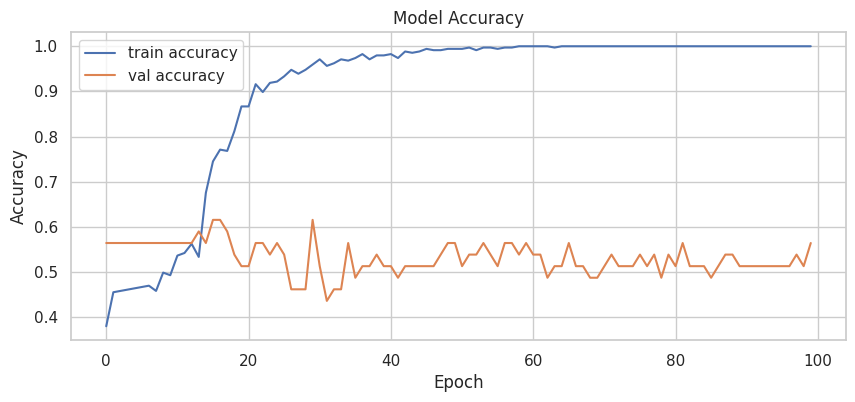

In [241]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(model_prediction.history['accuracy'], label='train accuracy')
ax.plot(model_prediction.history['val_accuracy'], label='val accuracy')
ax.set_title('Model Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend(loc='upper left')
plt.show()


In [243]:
text_clean = tweets['text_clean']
text_train, text_test = train_test_split(text_clean, test_size=0.2, random_state=0)
result_test = pd.DataFrame(data=zip(text_test, y_pred), columns=['text', 'polarity'])
polarity_decode = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
result_test['polarity'] = result_test['polarity'].map(polarity_decode)
pd.set_option('max_colwidth', 300)

# Display the result
result_test


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,text,polarity
0,profil aulia akbar sosok yang mendesain logo ikn pohon hayat,Negative
1,bisa jadi disharing dulu yg penting seperti buat bahan kaca dan tinta laser ampasnyaa dijual lagi buat ikn,Negative
2,ikn bisa jadi mangkrak,Neutral
3,reklamasi ikn,Neutral
4,gaet investor singapura jokowi bakal jelaskan konsep kota hijau ikn,Neutral
...,...,...
92,logo resmi ikn 🇮🇩🇮🇩,Positive
93,online mereka akan berpikir sesuatu hal lain yang terdapat di balik pohon lalu mengimajinasikan alasan dipilihnya gambar pohon unt…,Negative
94,kami warga sofifi akan mengawal pembangunan ikn,Positive
95,pelototi terus jkw rezim tolak periode penundaan pemilu tolak ikn batalkan kenaikan ppn pecat luh…,Negative
